<a href="https://colab.research.google.com/github/Udit-Kalra-1117/Chennai---House-Price-Prediction/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
import warnings         
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn import tree
import xgboost as xgb

In [ ]:
#making a dataframe
df = pd.read_csv("Chennai houseing sale.csv")
df

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 22 columns]

In [ ]:
#making a duplicate dataframe with original data
data = df
data

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 22 columns]

In [ ]:
data.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [ ]:
#Data Cleaning
# Removing all the null values
data.dropna(inplace=True)

# Renaming all the column names in lowercase letters
data.columns = data.columns.str.lower()


# Renaming all the string in area column names in lowercase letters
data.area = data.area.str.lower()

# Correcting the spelling mistakes in area columns
data.area = data.area.replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',  
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})


# Renaming all the string in sale_cond column names in lowercase letters
data.sale_cond = data.sale_cond.str.lower()

# Correcting the spelling mistakes in sale_cond columns
data.sale_cond = data.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})


# Renaming all the string in park_facil column names in lowercase letters
data.park_facil = data.park_facil.str.lower()

# Correcting the spelling mistakes in park_facil columns
data.park_facil = data.park_facil.replace({'noo':'no'})


# Renaming all the string in buildtype column names in lowercase letters
data.buildtype = data.buildtype.str.lower()

# Correcting the spelling mistakes in buildtype columns
data.buildtype = data.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})


# Renaming all the string in utility_avail column names in lowercase letters
data.utility_avail = data.utility_avail.str.lower()

# Correcting the spelling mistakes in utility_avail columns
data.utility_avail = data.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})
                                            
                                            
# Renaming all the string in street column names in lowercase letters
data.street = data.street.str.lower()

# Correcting the spelling mistakes in street columns
data.street = data.street.replace({'pavd':'paved', 
                       'noaccess':'no access'})


# Renaming all the string in mzzone column names in lowercase letters
data.mzzone = data.mzzone.str.lower()

# Fixing the correct Data Type of columns
data.n_bedroom = data.n_bedroom.astype(int)
data.n_bathroom = data.n_bathroom.astype(int)

# Correcting Date columns from object to date-time format
data.date_sale = pd.to_datetime(data.date_sale, format='%d-%m-%Y')
data.date_build = pd.to_datetime(data.date_build, format='%d-%m-%Y')

# Creating property_age column which determines how old the property is
data['property_age'] = pd.DatetimeIndex(data.date_sale).year - pd.DatetimeIndex(data.date_build).year

# Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns
data['total_price'] = pd.DataFrame(data.reg_fee	+ data.commis	+ data.sales_price)

# Rearranging the columns of dataframe 
data = data.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])


data.head(3)

prt_id        area sale_cond park_facil   buildtype utility_avail  street  \
0  P03210  karapakkam  abnormal        yes  commercial        allpub   paved   
1  P09411  anna nagar  abnormal         no  commercial        allpub  gravel   
2  P01812       adyar  abnormal        yes  commercial           elo  gravel   

  mzzone date_build  date_sale  ...  n_bathroom  n_room  qs_rooms  \
0      a 1967-05-15 2011-05-04  ...           1       3       4.0   
1     rh 1995-12-22 2006-12-19  ...           1       5       4.9   
2     rl 1992-02-09 2012-02-04  ...           1       3       4.1   

   qs_bathroom  qs_bedroom  qs_overall  reg_fee  commis  sales_price  \
0          3.9         4.9       4.330   380000  144400      7600000   
1          4.2         2.5       3.765   760122  304049     21717770   
2          3.8         2.2       3.090   421094   92114     13159200   

   total_price  
0      8124400  
1     22781941  
2     13672408  

[3 rows x 24 columns]

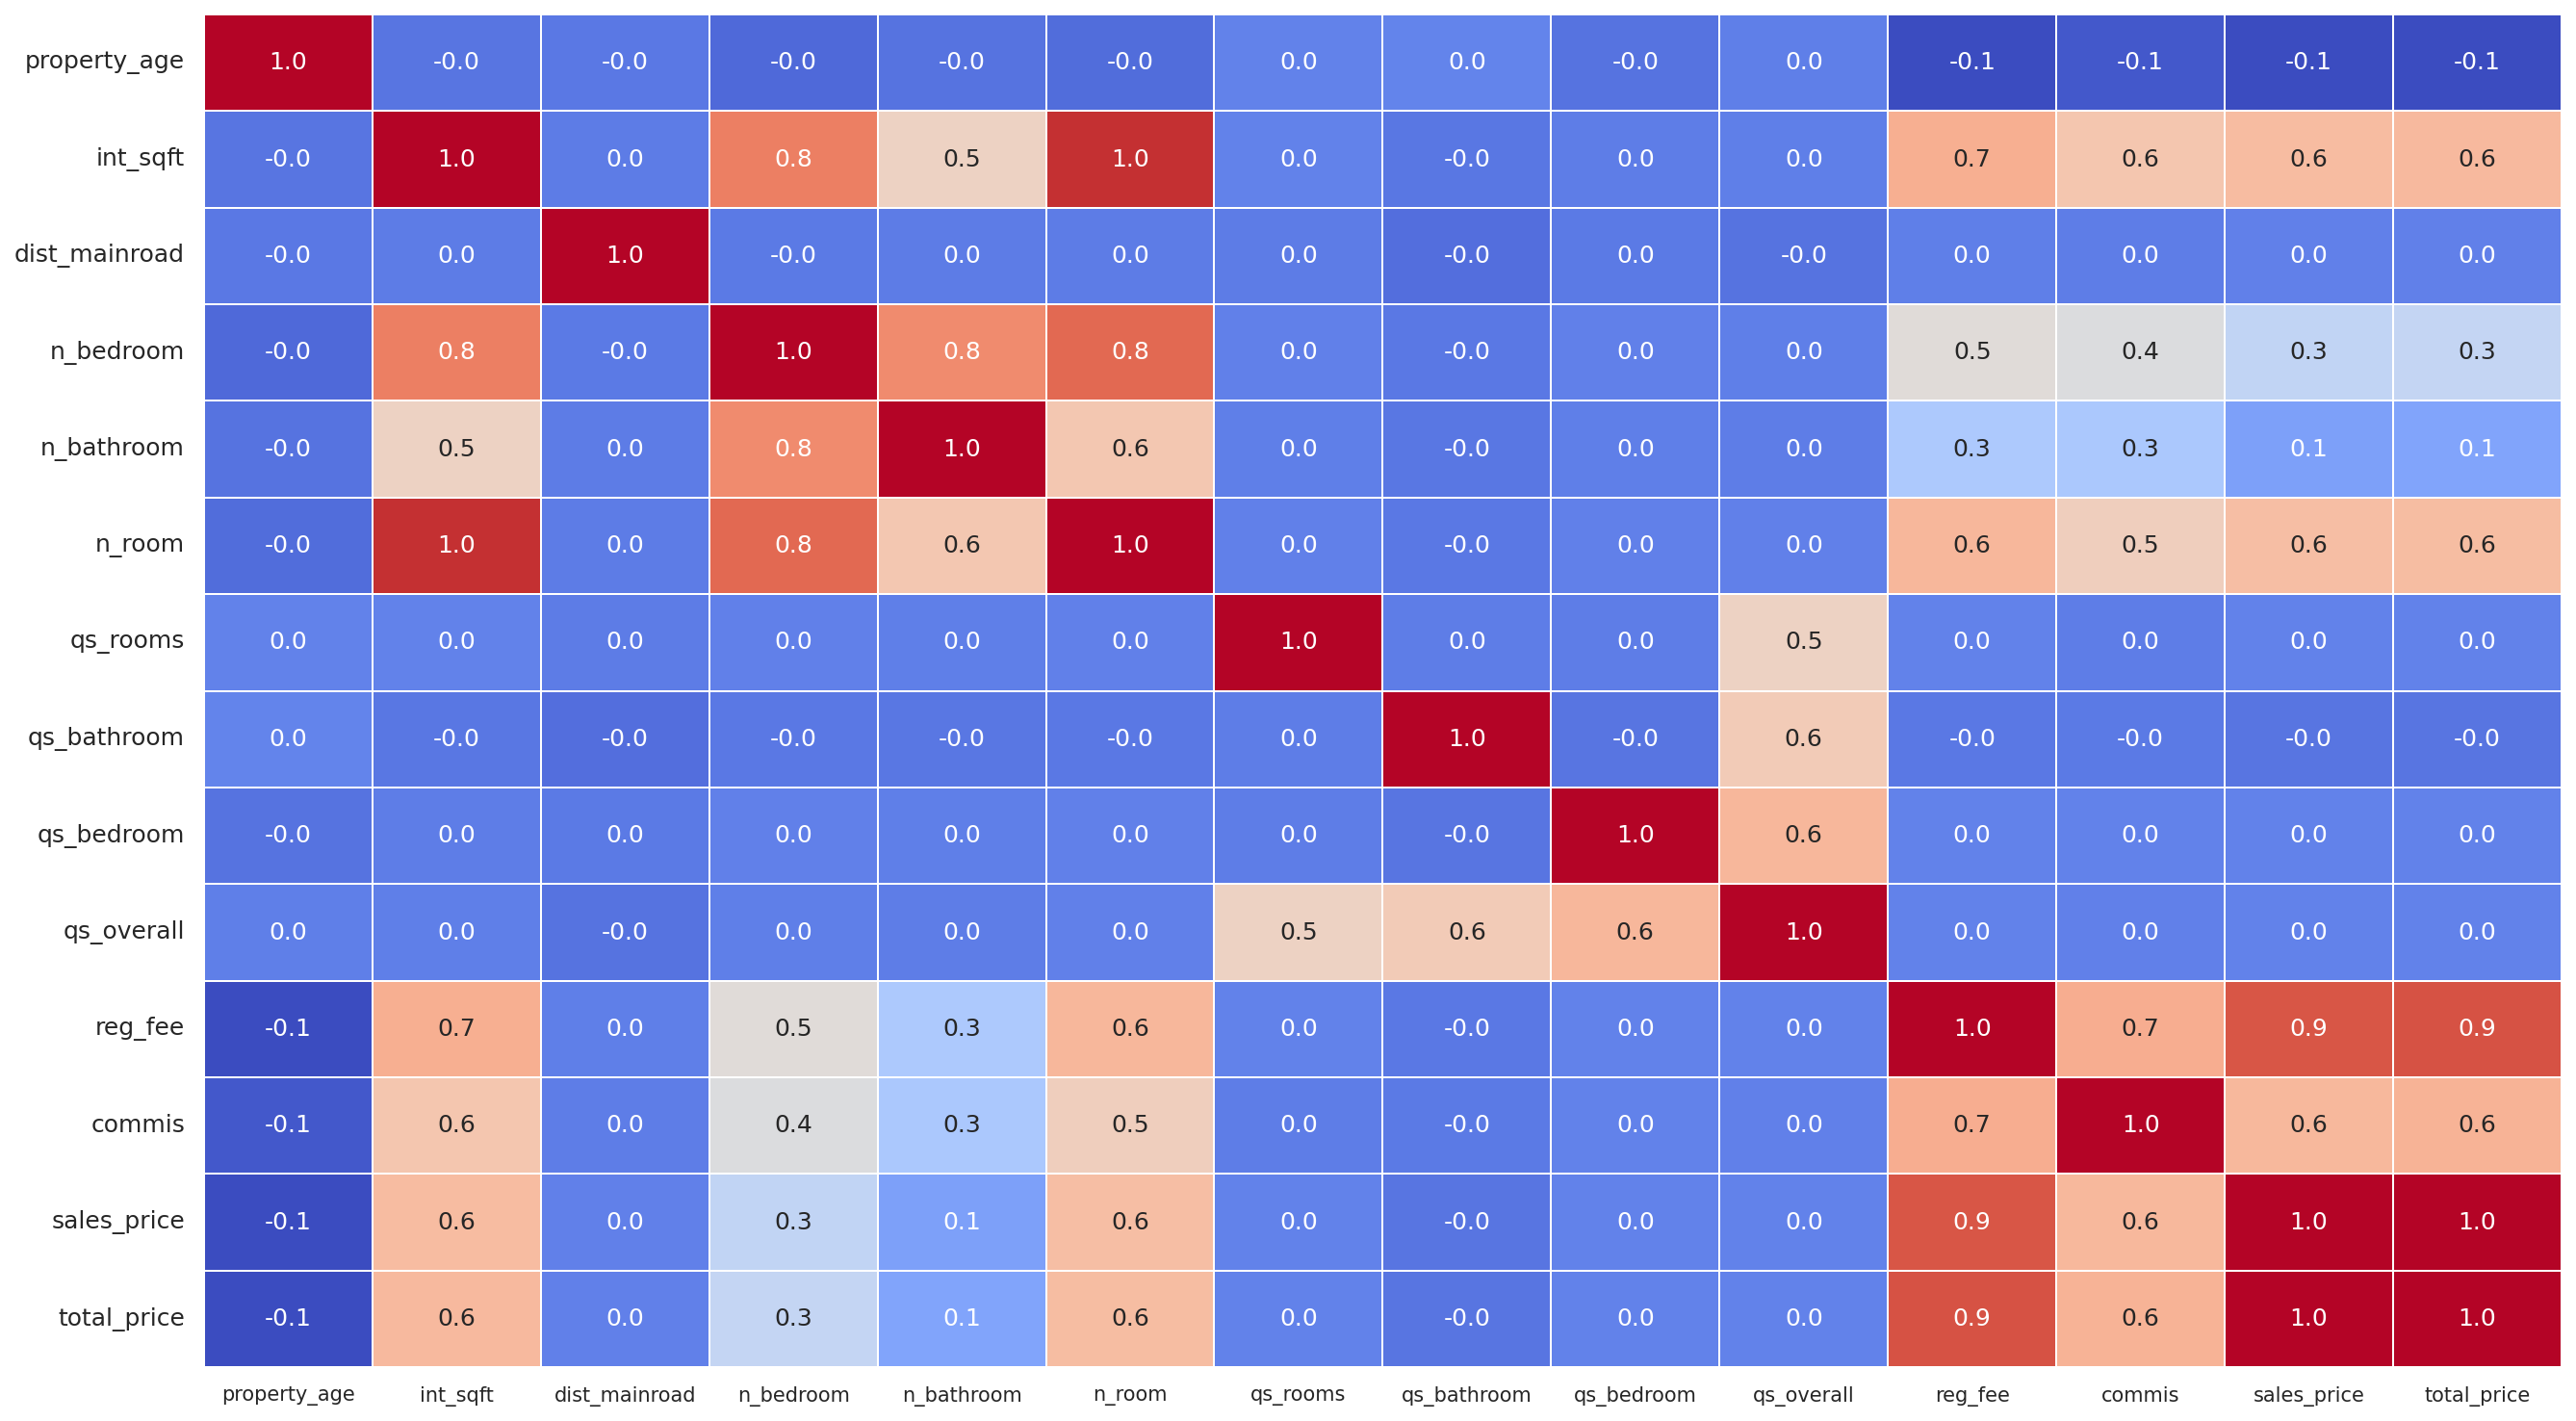

In [ ]:
#Exploratory Data Analysis
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

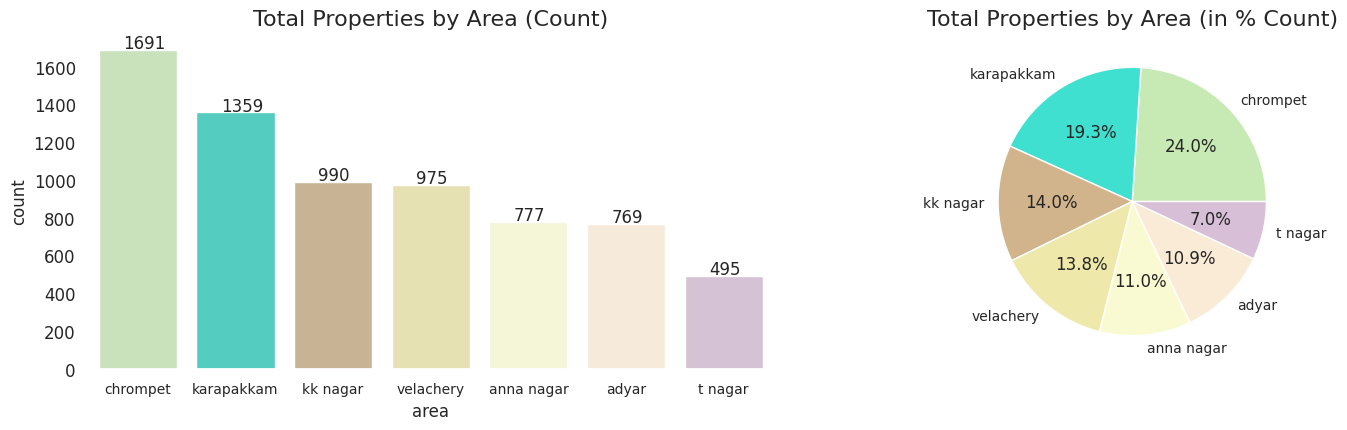

In [ ]:
#Property count by area
sns.set(rc={'axes.facecolor':'None','axes.grid':False,'xtick.labelsize':10,'ytick.labelsize':12, 'figure.autolayout':True})
my_col = ('#c7e9b4', '#40E0D0', '#D2B48C', '#EEE8AA','#FAFAD2','#FAEBD7', '#D8BFD8','#F4A460','#F08080')
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title('Total Properties by Area (Count)', fontdict={'fontsize':16})
ax = sns.countplot(x="area", data=df, palette=my_col, order=df['area'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+8))

plt.subplot(2,2,2)
plt.title('Total Properties by Area (in % Count)', fontdict={'fontsize':16})
df['area'].value_counts().plot(kind='pie', colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
plt.show()

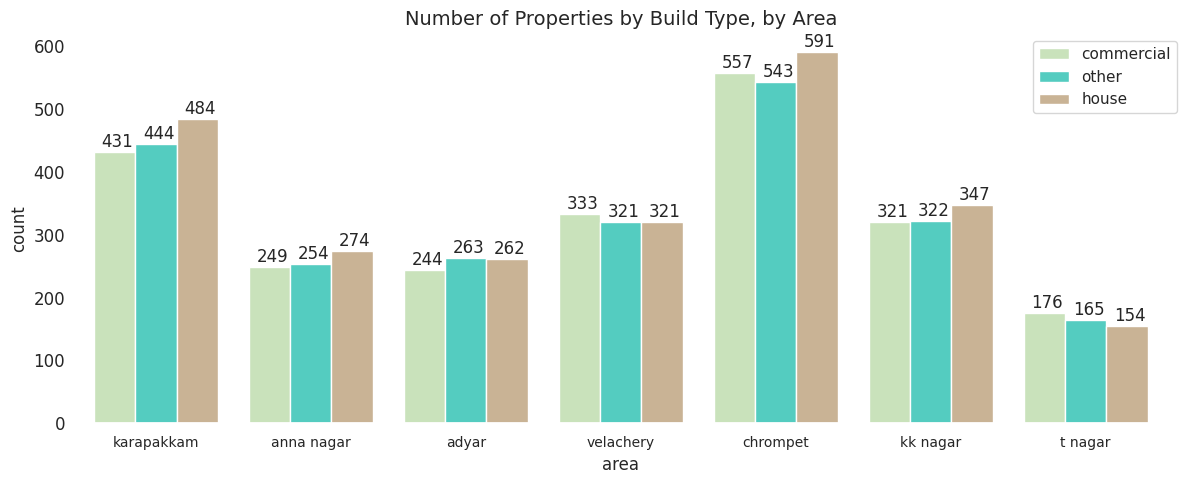

In [ ]:
## We make a column chart to visualise property count by build type & by area

plt.figure(figsize=(12,5))
plt.title('Number of Properties by Build Type, by Area', fontdict={'fontsize':14})
ax = sns.countplot(x='area', hue='buildtype', palette=my_col, data=df)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+8))

plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()

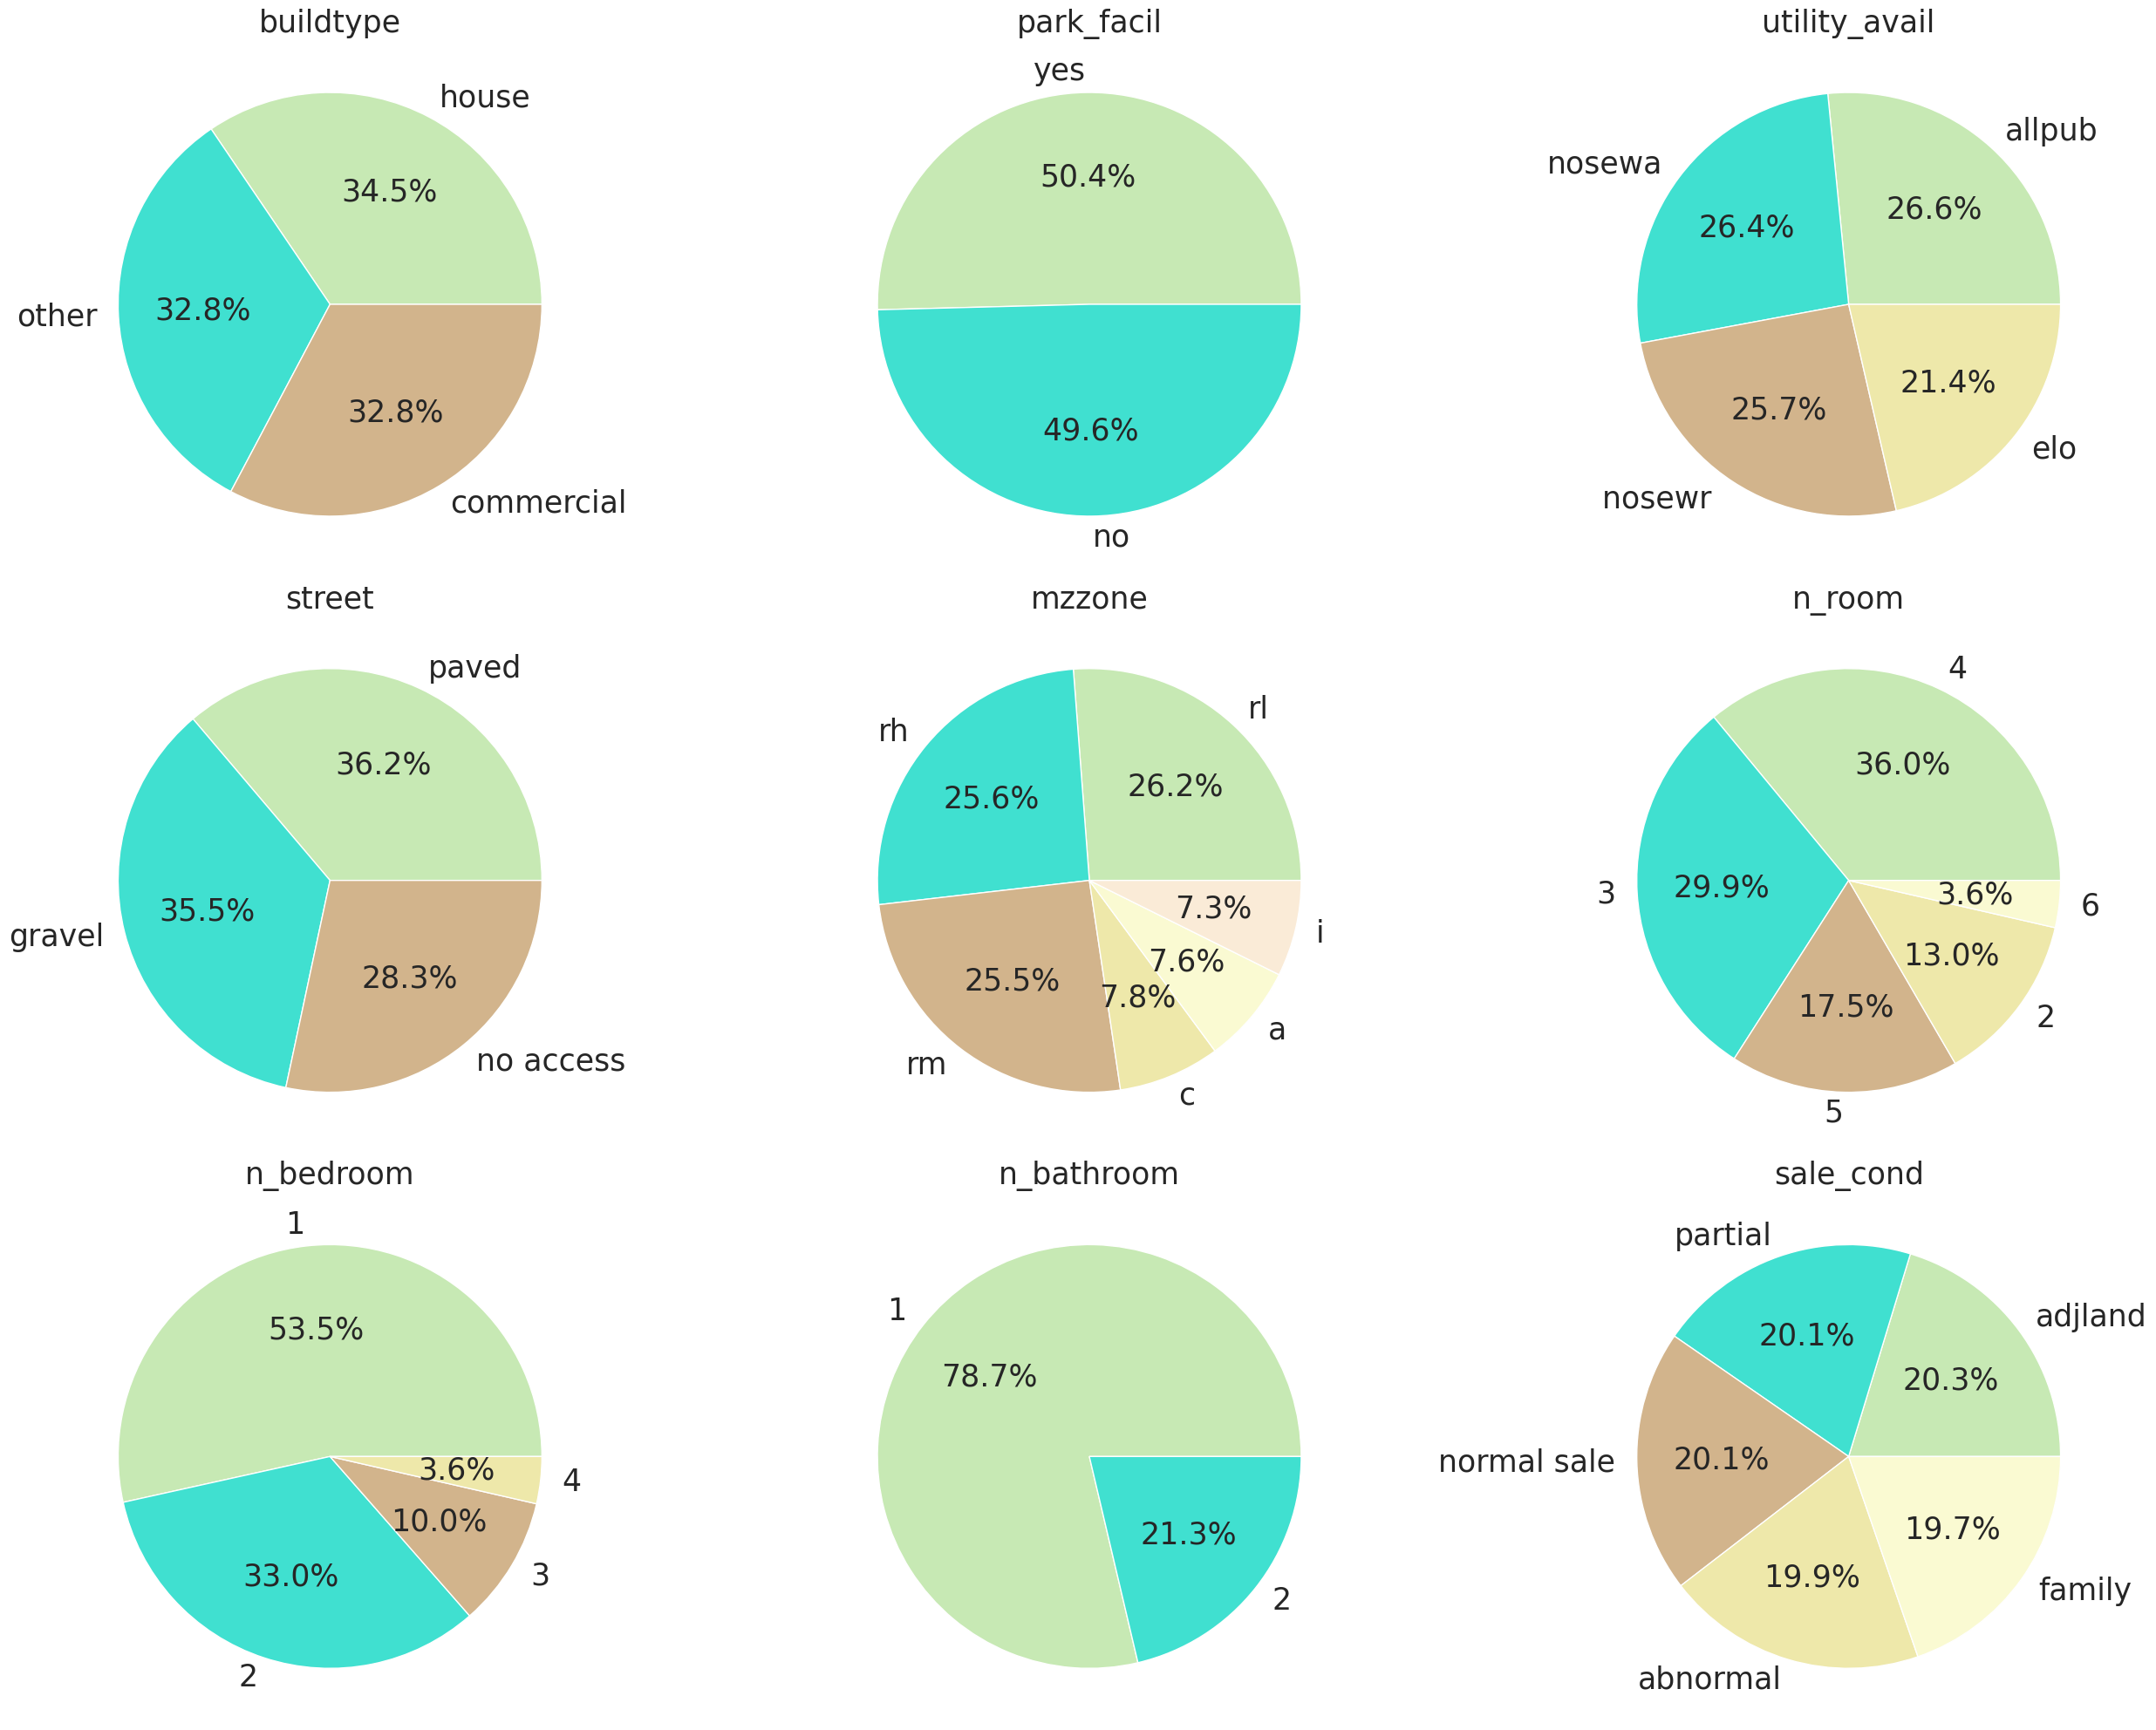

In [ ]:
#segment share analysis
plt.figure(figsize=(26,20))

#############################
## BUILD TYPE
#############################
plt.subplot(3,3,1)
plt.title('buildtype', fontdict={'fontsize':25})
df['buildtype'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
#############################
## PARKING FACILITY
#############################
plt.subplot(3,3,2)
plt.title('park_facil', fontdict={'fontsize':25})
df['park_facil'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
#############################
## UTILITY AVAILABLE
#############################
plt.subplot(3,3,3)
plt.title('utility_avail', fontdict={'fontsize':25})
df['utility_avail'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
#############################
## STREET TYPE
#############################
plt.subplot(3,3,4)
plt.title('street', fontdict={'fontsize':25})
df['street'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
#############################
## MZZONE
#############################
plt.subplot(3,3,5)
plt.title('mzzone', fontdict={'fontsize':25})
df['mzzone'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
#############################
## NUMBER OF ROOMS
#############################
plt.subplot(3,3,6)
plt.title('n_room', fontdict={'fontsize':25})
df['n_room'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
#############################
## NUMBER OF BEDROOMS
#############################
plt.subplot(3,3,7)
plt.title('n_bedroom', fontdict={'fontsize':25})
df['n_bedroom'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
#############################
## NUMBER OF BATHROOMS
#############################
plt.subplot(3,3,8)
plt.title('n_bathroom', fontdict={'fontsize':25})
df['n_bathroom'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='',  autopct='%1.1f%%')
#############################
## SALE CONDITION
#############################
plt.subplot(3,3,9)
plt.title('sale_cond', fontdict={'fontsize':25})
df['sale_cond'].value_counts().plot(kind='pie', fontsize = 25, colors=my_col, legend=None, ylabel='', autopct='%1.1f%%')
plt.show()

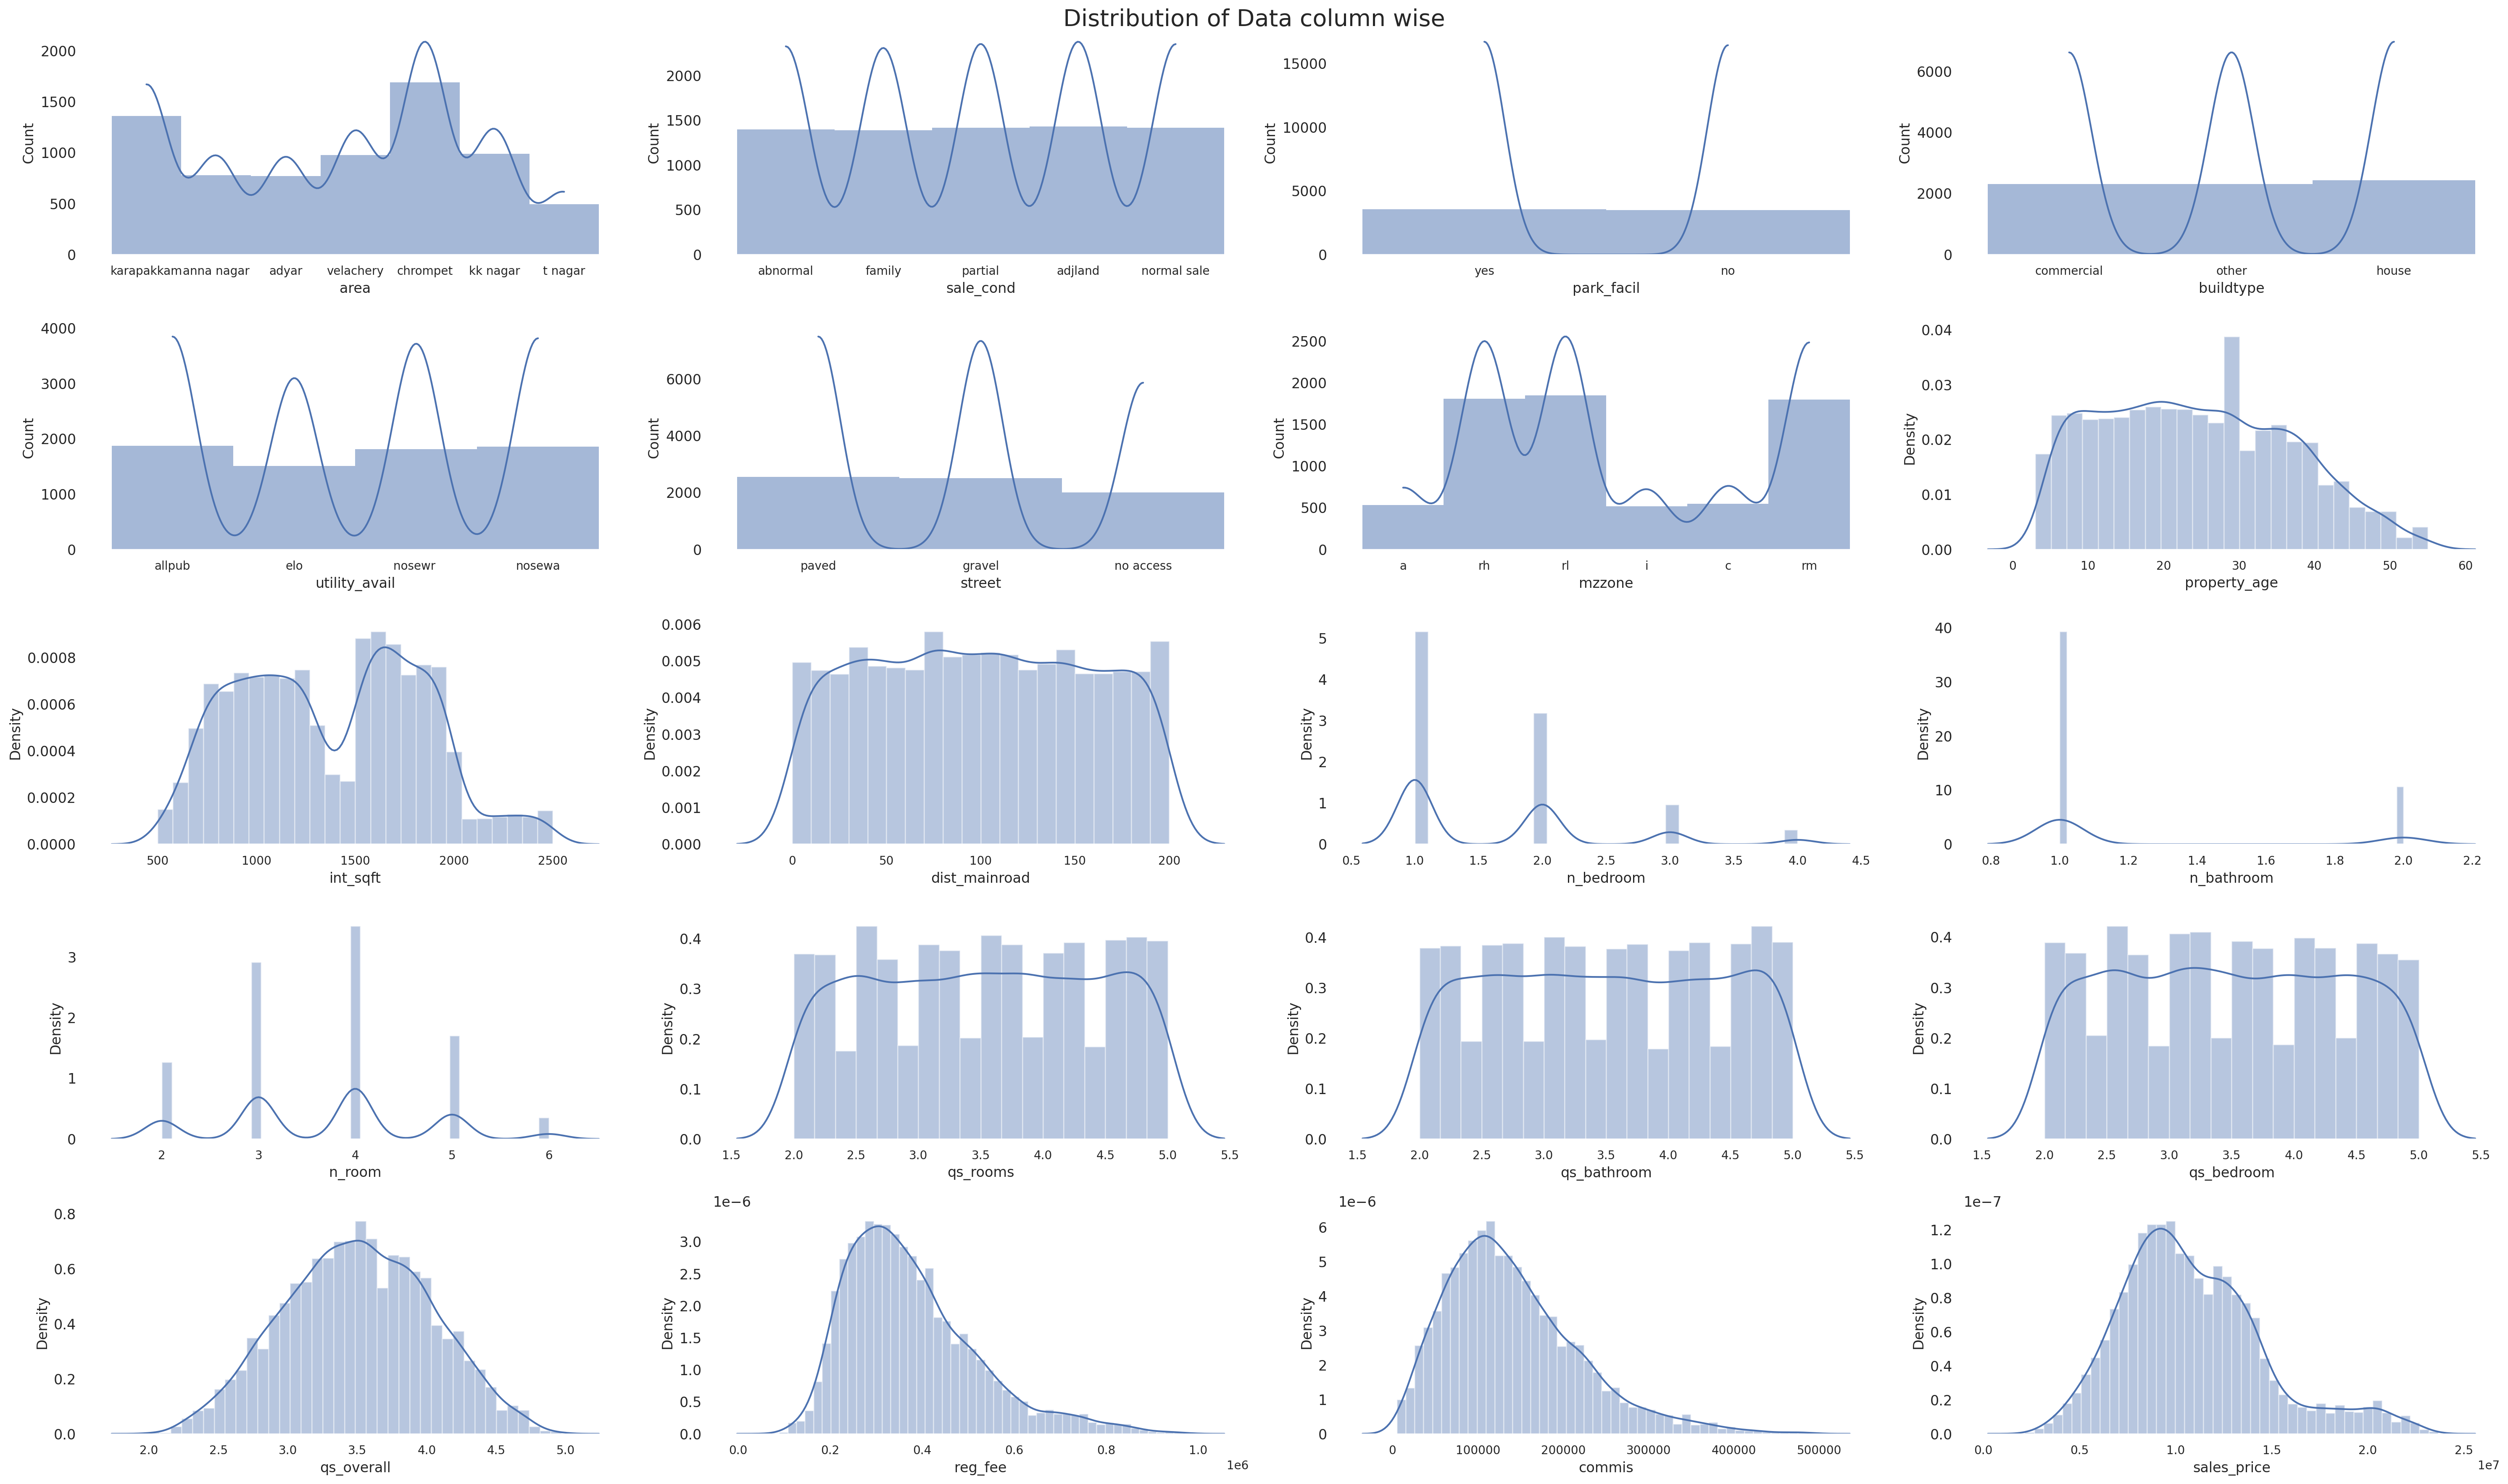

In [ ]:
#Distribution of Features in Data Columns
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(data.area, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(data.sale_cond, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(data.park_facil, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(data.buildtype, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(data.utility_avail, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(data.street, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(data.mzzone, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(data.property_age)

plt.subplot(5,4,9)
sns.distplot(data.int_sqft)

plt.subplot(5,4,10)
sns.distplot(data.dist_mainroad)

plt.subplot(5,4,11)
sns.distplot(data.n_bedroom)

plt.subplot(5,4,12)
sns.distplot(data.n_bathroom)

plt.subplot(5,4,13)
sns.distplot(data.n_room)

plt.subplot(5,4,14)
sns.distplot(data.qs_rooms)

plt.subplot(5,4,15)
sns.distplot(data.qs_bathroom)

plt.subplot(5,4,16)
sns.distplot(data.qs_bedroom)

plt.subplot(5,4,17)
sns.distplot(data.qs_overall)

plt.subplot(5,4,18)
sns.distplot(data.reg_fee)

plt.subplot(5,4,19)
sns.distplot(data.commis)

plt.subplot(5,4,20)
sns.distplot(data.sales_price)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

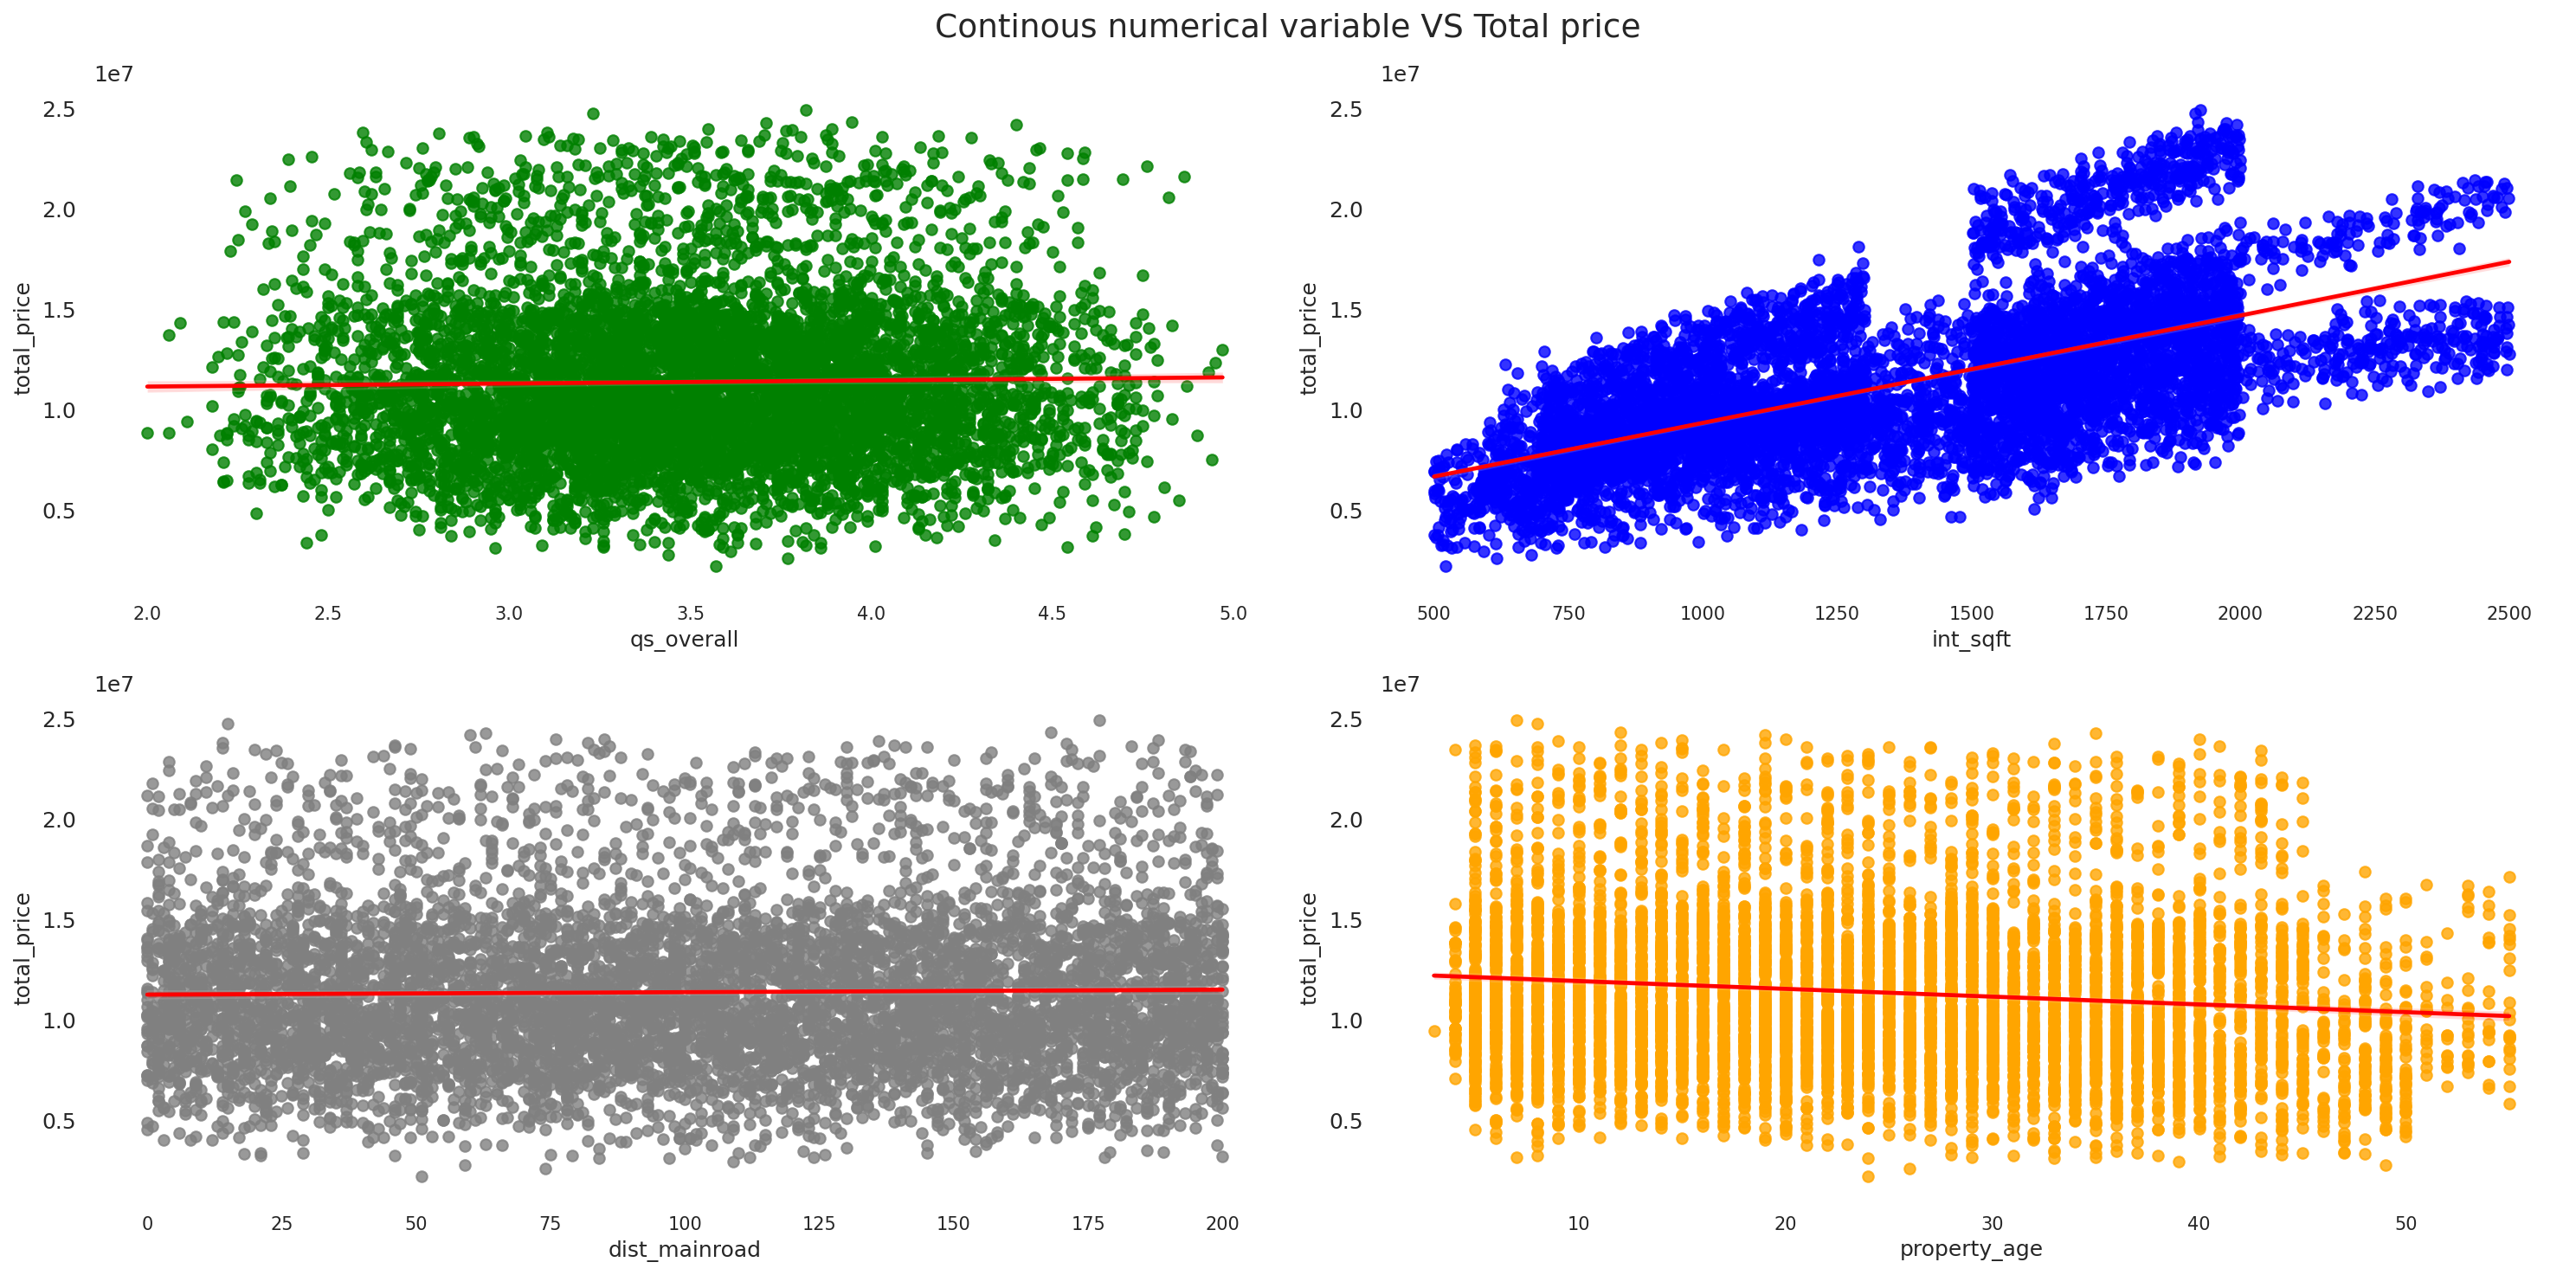

In [ ]:
#Plotting Features column vs Target column
#1. Numerical Columns
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(x = data.qs_overall, y = data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot(2,2,2)
sns.regplot(x = data.int_sqft, y = data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(x = data.dist_mainroad, y = data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot(2,2,4)
sns.regplot(x = data.property_age, y = data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.suptitle("Continous numerical variable VS Total price", fontsize=18)
plt.show()

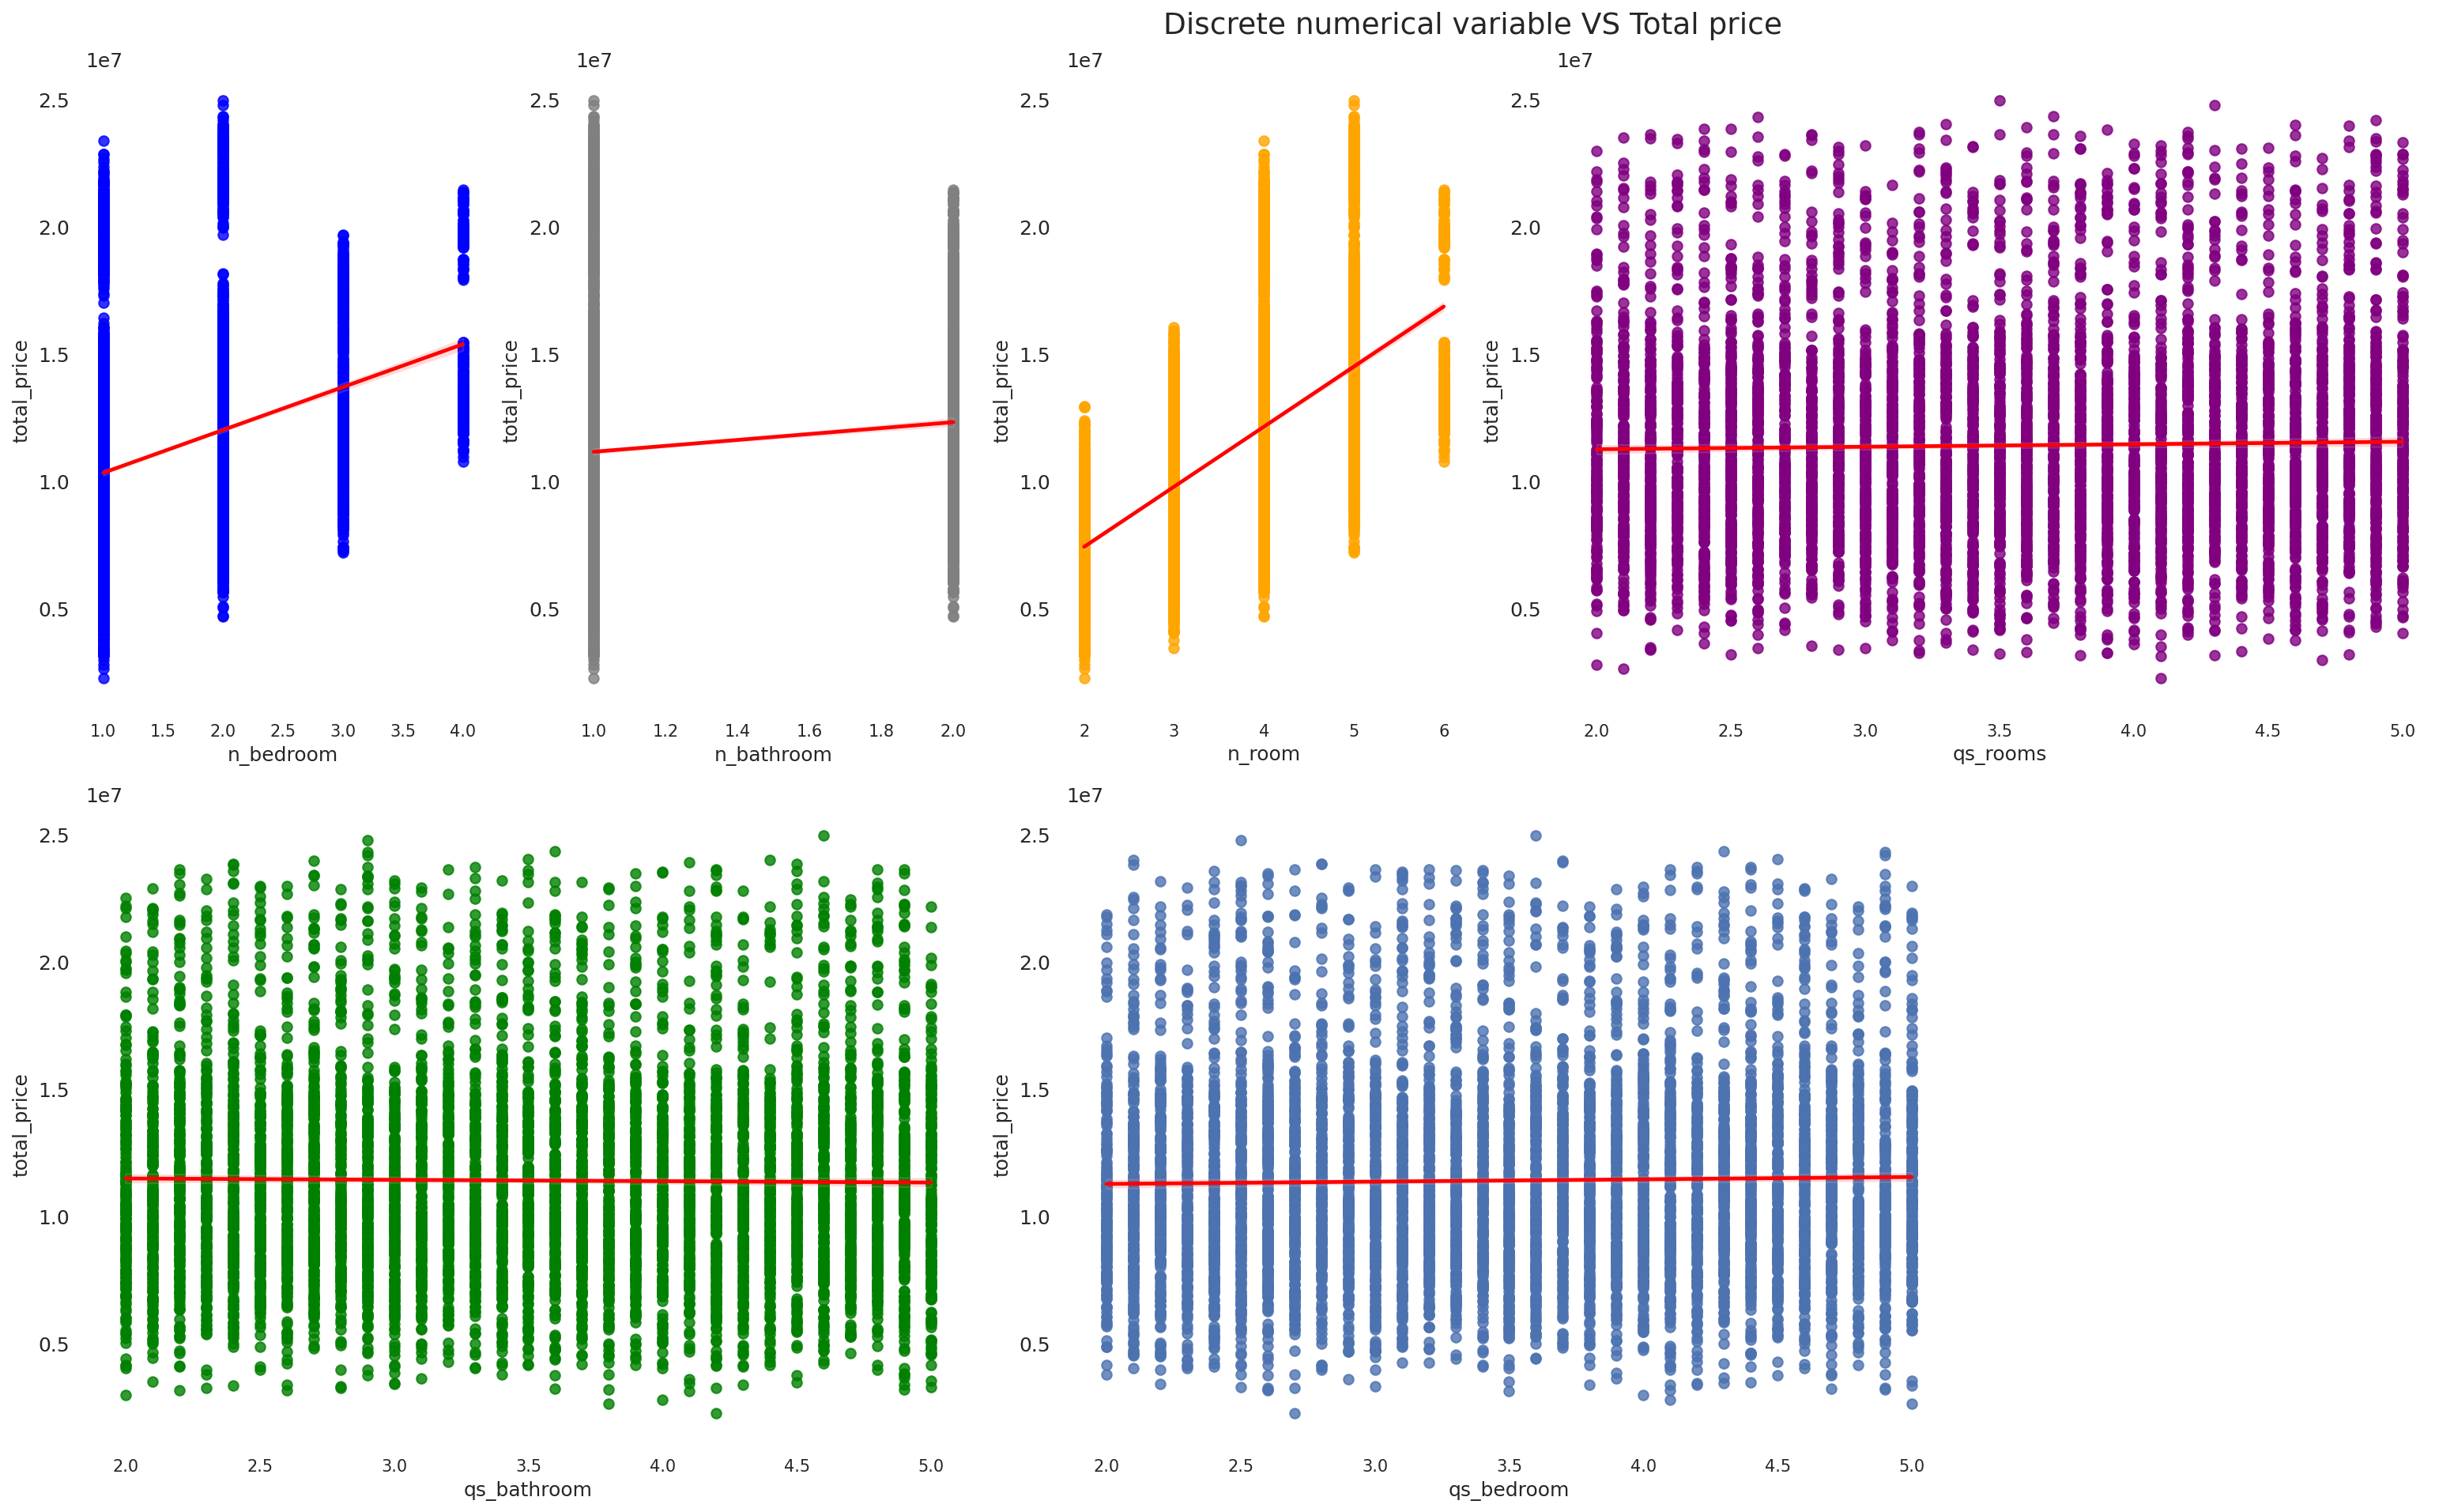

In [ ]:
#2. Discrete numerical variable
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(x = data.n_bedroom, y = data.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(x = data.n_bathroom, y = data.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(x = data.n_room, y = data.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(x = data.qs_rooms, y = data.total_price, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(x = data.qs_bathroom, y = data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(x = data.qs_bedroom, y = data.total_price, line_kws={"color": "red"})

plt.suptitle("Discrete numerical variable VS Total price", fontsize=18)
plt.show()

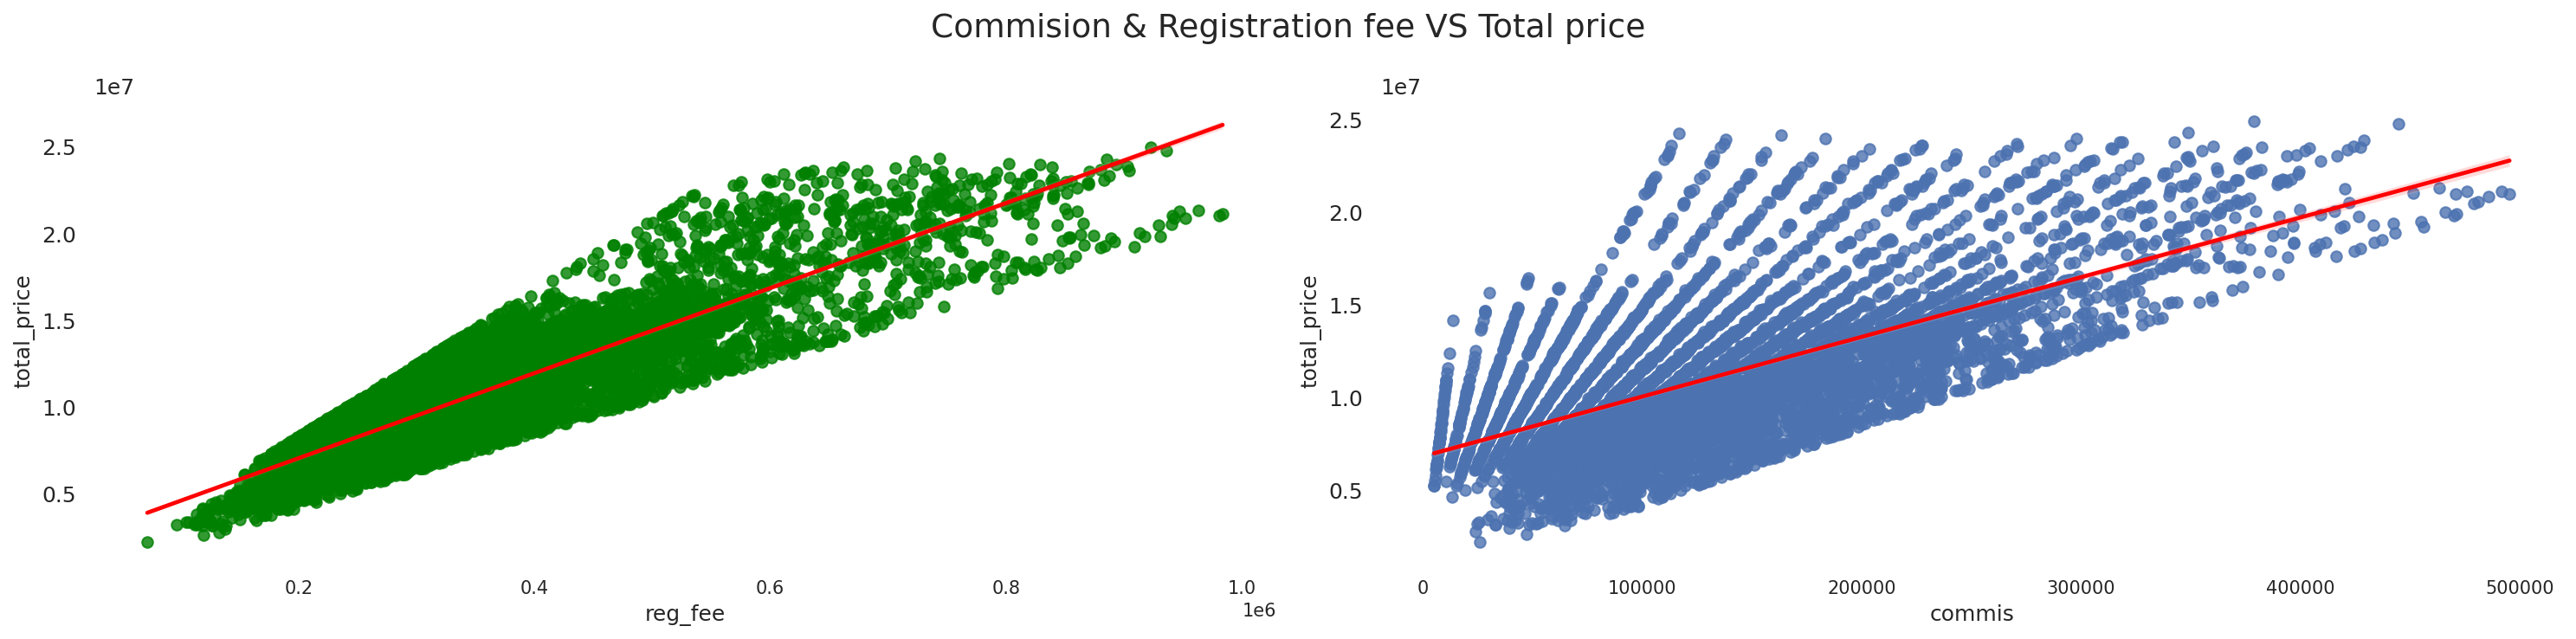

In [ ]:
#Commission and Registration fee columns
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(x = data.reg_fee, y = data.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(x = data.commis, y = data.total_price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

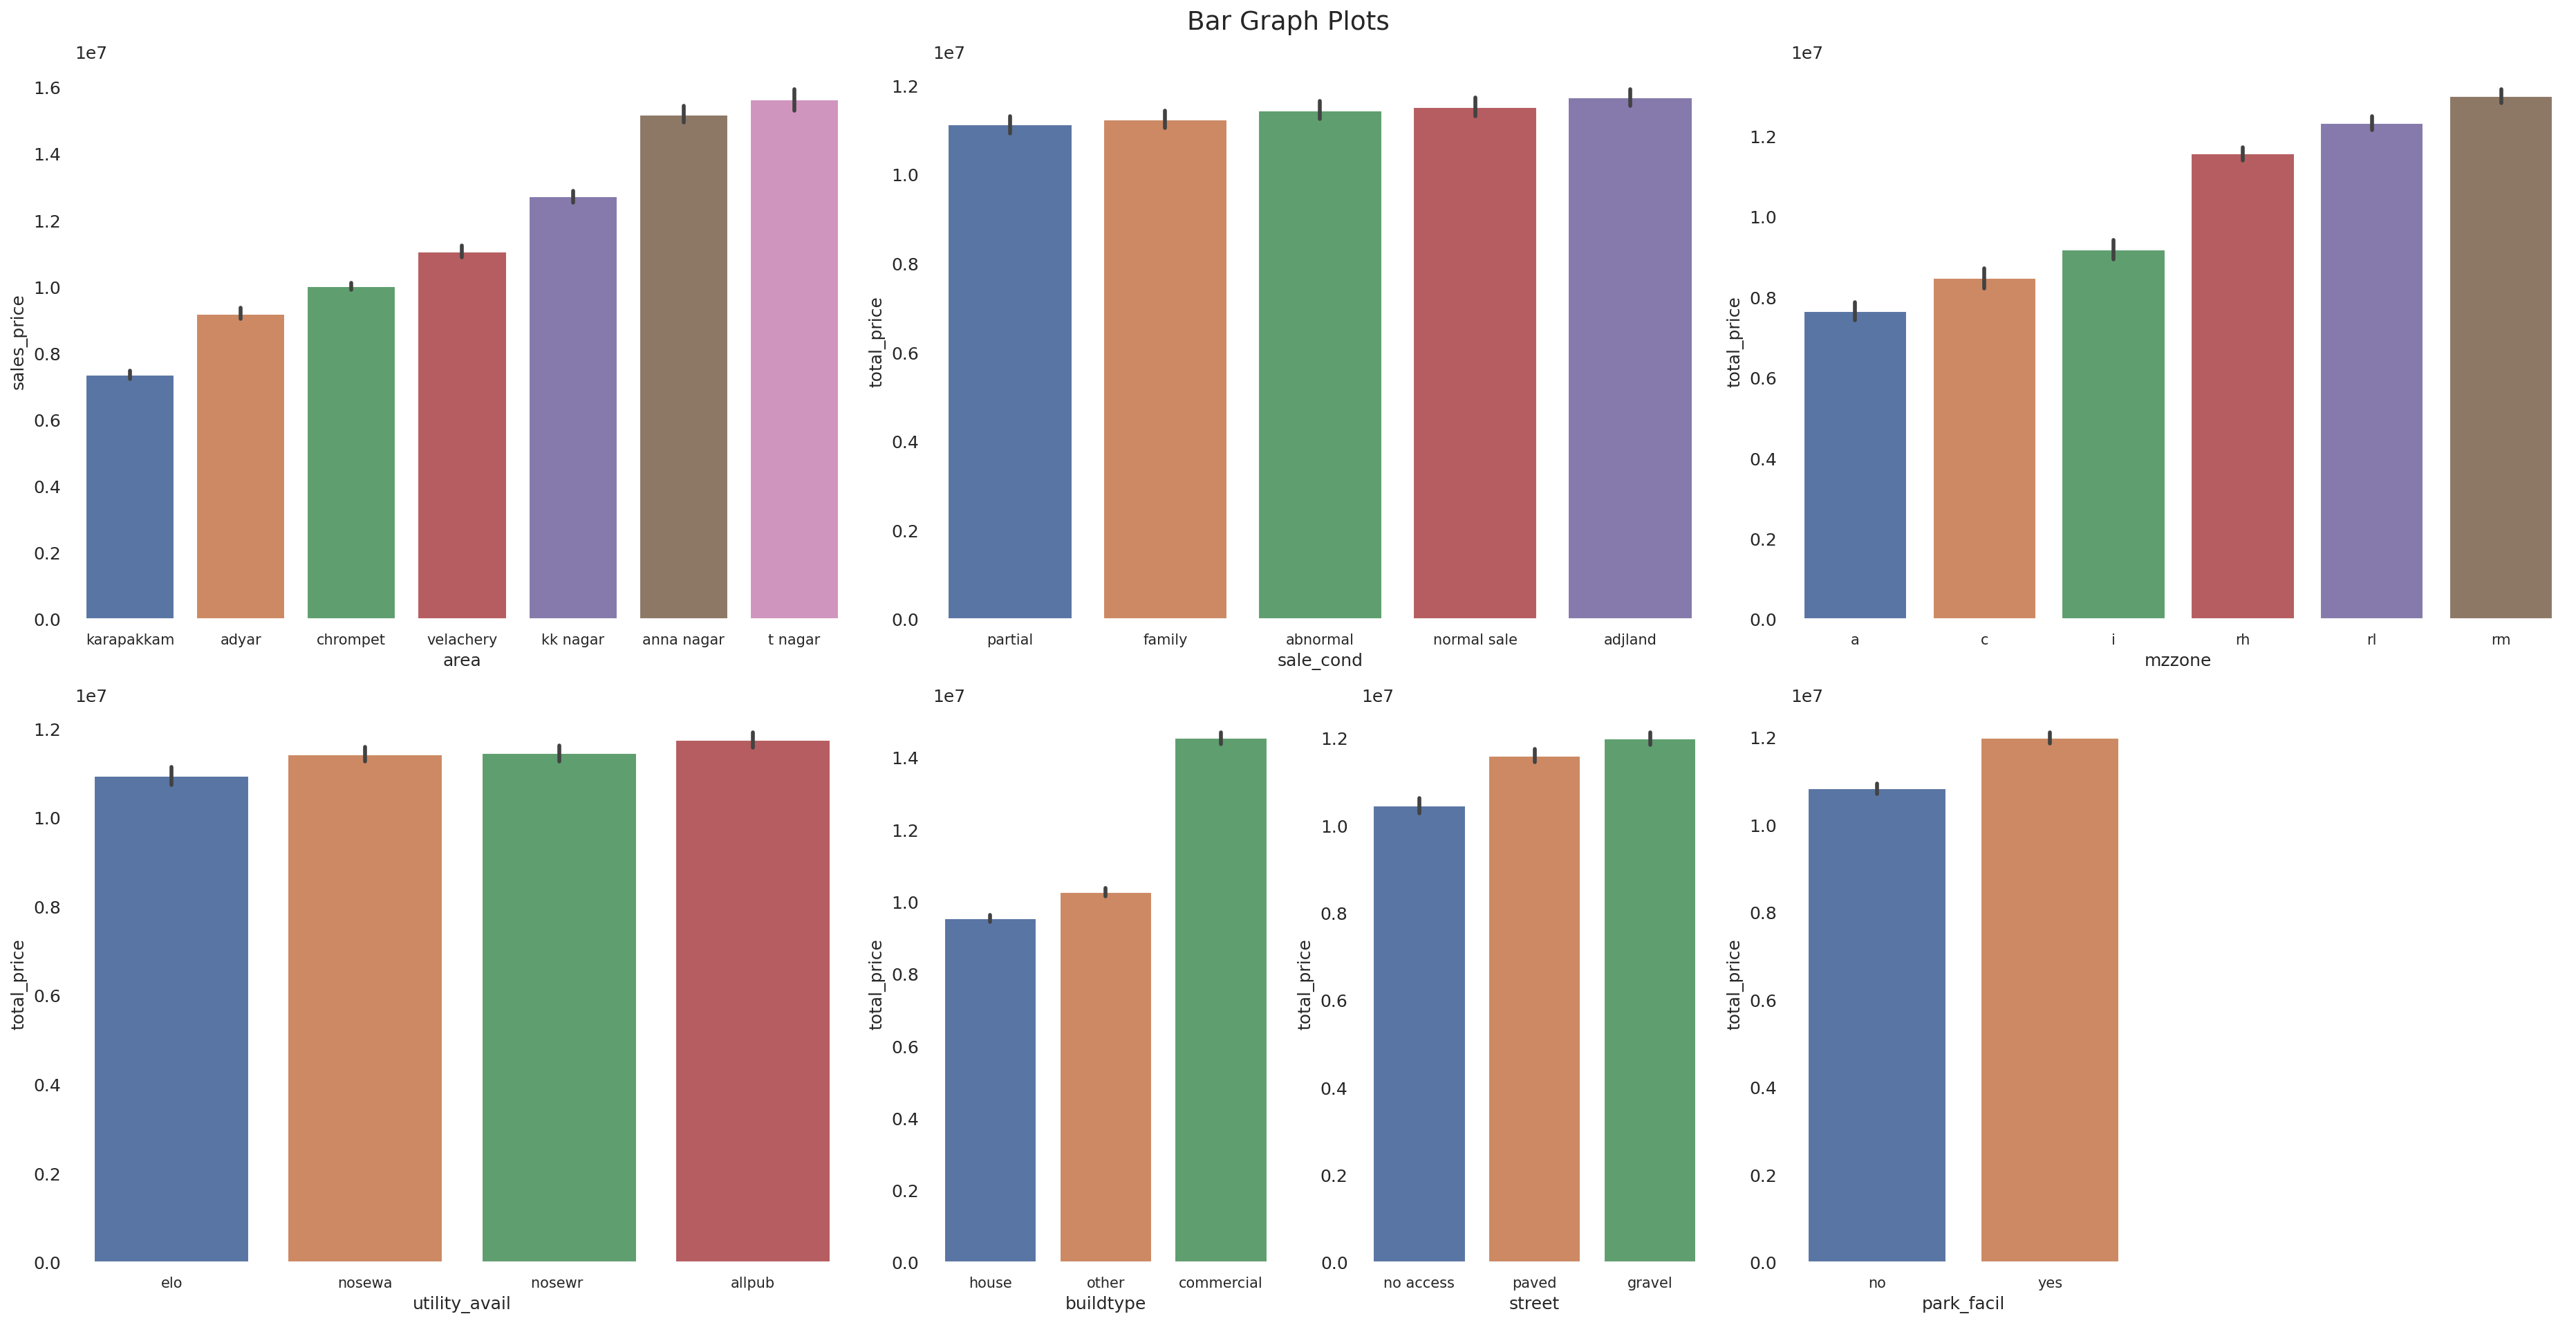

In [ ]:
#Categorical Columns
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=data.area,y=data.sales_price,order=data.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=data.sale_cond,y=data.total_price,order=data.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=data.mzzone,y=data.total_price,order=data.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=data.utility_avail,y=data.total_price,order=data.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=data.buildtype,y=data.total_price,order=data.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=data.street,y=data.total_price,order=data.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=data.park_facil,y=data.total_price,order=data.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

plt.suptitle("Bar Graph Plots", fontsize=18)
plt.show()

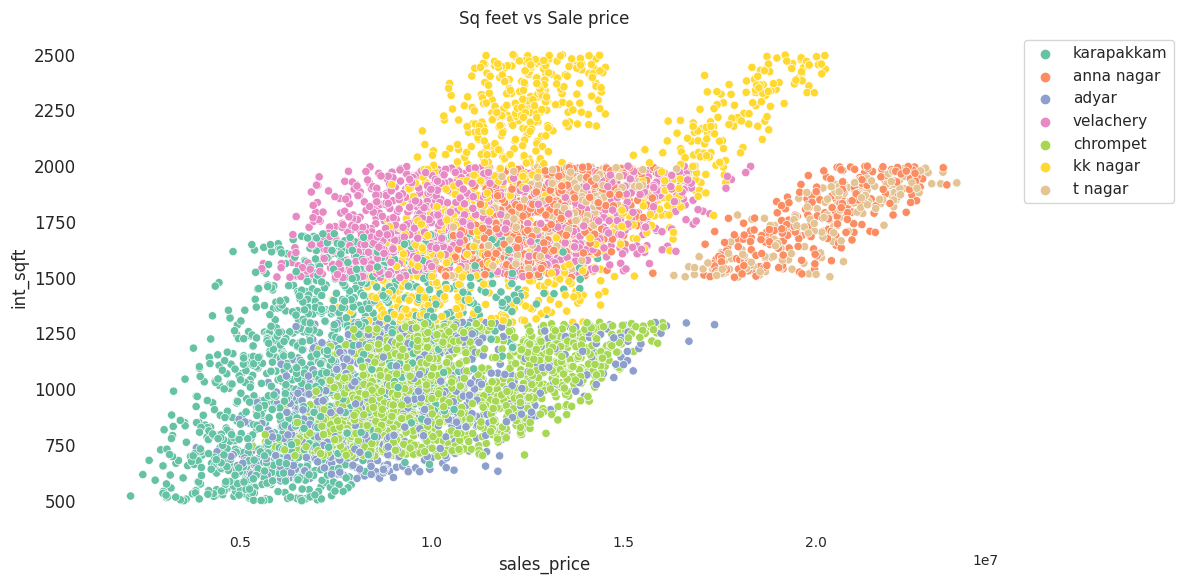

In [ ]:
## Sq feet vs sale price
plt.figure(figsize=(12,6))
sns.scatterplot(x='sales_price', y='int_sqft', hue='area', palette='Set2', data=df)
plt.title('Sq feet vs Sale price')
plt.legend(bbox_to_anchor=(1.02, 1))
plt.show()


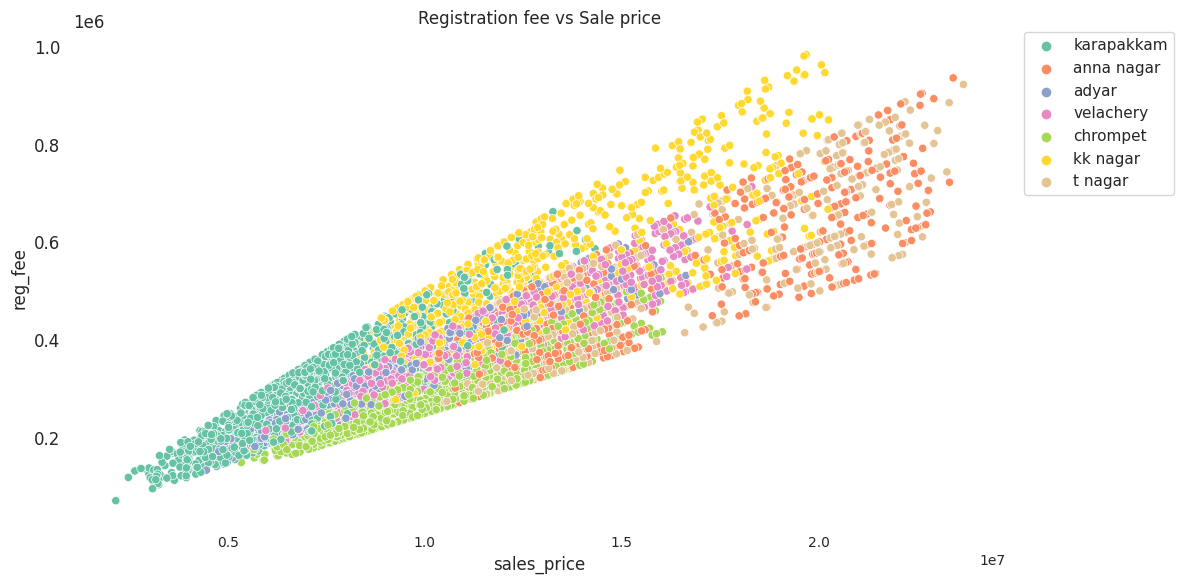

In [ ]:
## Registration fee vs sale price
plt.figure(figsize=(12,6))
sns.scatterplot(x='sales_price', y='reg_fee', hue='area', palette="Set2", data=df).set(title='Registration fee vs Sale price')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

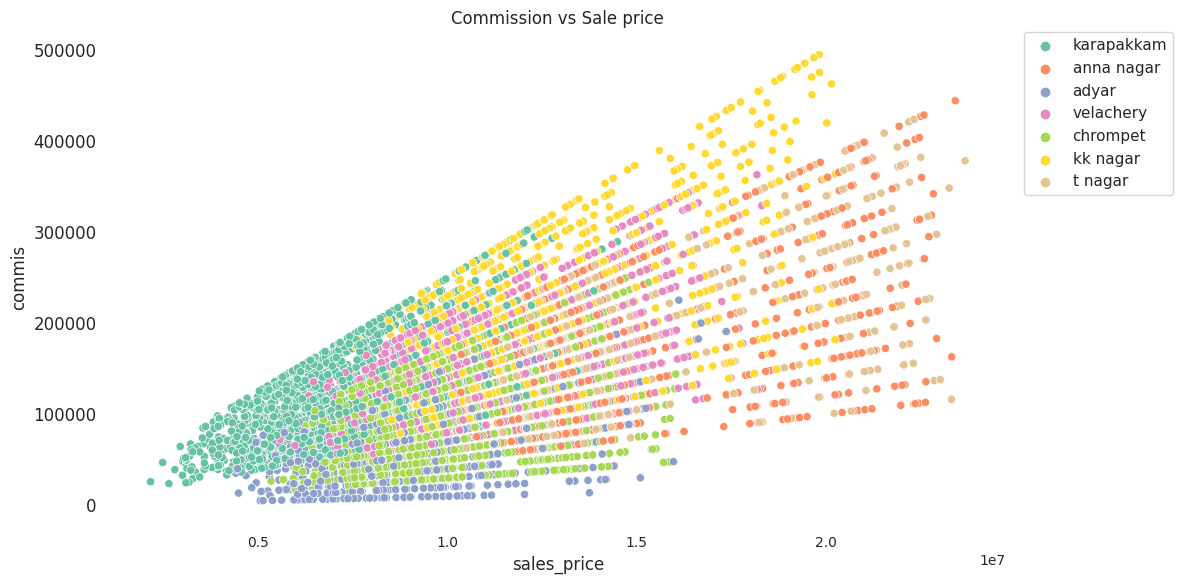

In [ ]:
## Commission vs sale price
plt.figure(figsize=(12,6))
sns.scatterplot(x='sales_price', y='commis', hue='area', palette="Set2", data=df).set(title='Commission vs Sale price')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:
#Encoding
#OneHotEncoder
data = pd.get_dummies(data,columns=['buildtype'])

In [ ]:
data.area_replace = data.area.replace({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})
data.area_replace

0       1
1       6
2       2
3       4
4       1
       ..
7104    1
7105    4
7106    4
7107    1
7108    4
Name: area, Length: 7056, dtype: int64

In [ ]:
#Label Encoder (Mapping)
# Encoding the area column order-wise 
data.area = data.area.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})


# Encoding the sale_cond column order-wise 
data.sale_cond = data.sale_cond.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

# Encoding the park_facil column order-wise 
data.park_facil = data.park_facil.map({'yes':1,
                                       'no':0})

# Encoding the utility_avail column order-wise 
data.utility_avail = data.utility_avail.map({'elo' : 1, 
                                             'nosewa' : 2, 
                                             'nosewr ' : 3,
                                             'allpub' : 4})
                                          
# Encoding the street column order-wise 
data.street = data.street.map({'no access' : 1,
                               'paved' : 2, 
                               'gravel' : 3})


# Encoding the mzzone column order-wise 
data.mzzone = data.mzzone.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 4,
                               'rm' : 6})


In [ ]:
# Removing unnecessary columns and Rearranging the columns of dataframe 
data = data.reindex(columns = ['area', 'sale_cond', 'park_facil',
       'buildtype_commercial', 'buildtype_house','buildtype_other', 'utility_avail',
       'street', 'mzzone', 'property_age', 'int_sqft', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
        'qs_overall', 'reg_fee', 'commis', 'sales_price', 'total_price'])

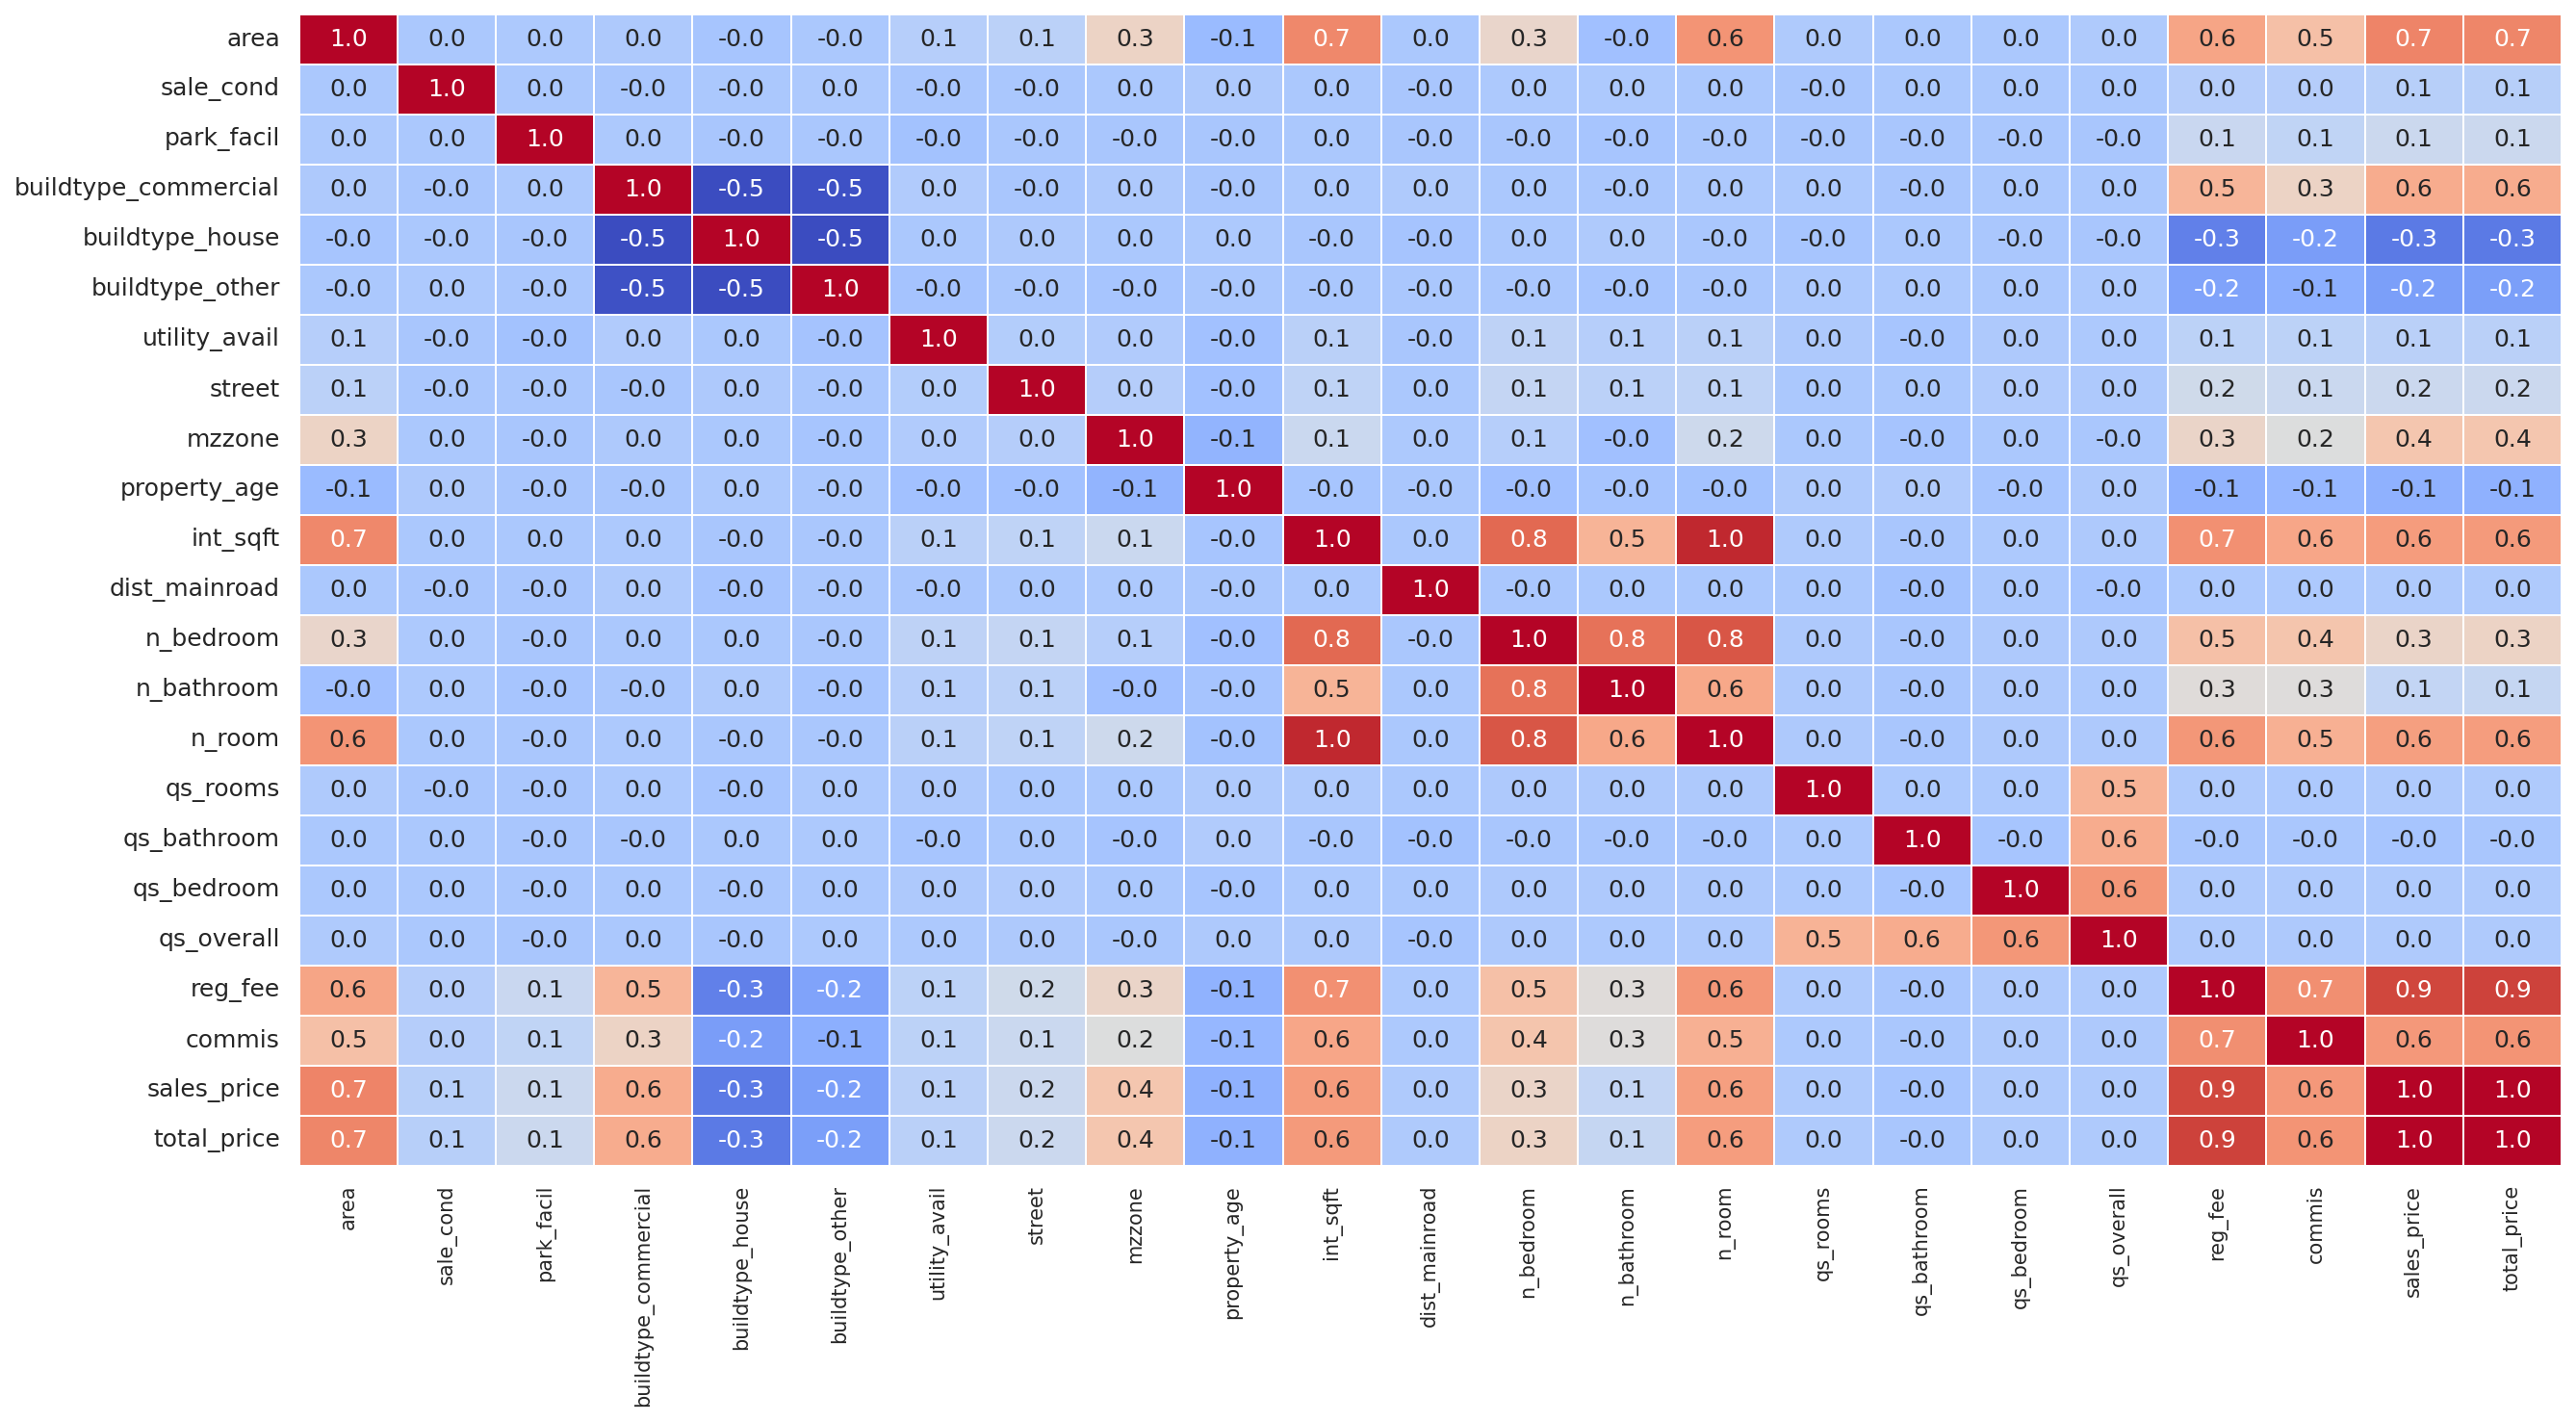

In [ ]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

In [ ]:
data.head(3)

area  sale_cond  park_facil  buildtype_commercial  buildtype_house  \
0     1          3           1                     1                0   
1     6          3           0                     1                0   
2     2          3           1                     1                0   

   buildtype_other  utility_avail  street  mzzone  property_age  ...  \
0                0              4       2       1            44  ...   
1                0              4       3       4            11  ...   
2                0              1       3       5            20  ...   

   n_bathroom  n_room  qs_rooms  qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0           1       3       4.0          3.9         4.9       4.330   380000   
1           1       5       4.9          4.2         2.5       3.765   760122   
2           1       3       4.1          3.8         2.2       3.090   421094   

   commis  sales_price  total_price  
0  144400      7600000      8124400  
1  304049     21717770     22781941  
2   92114     13159200     13672408  

[3 rows x 23 columns]

In [ ]:
# Removing unnecessary features which has negligible relation with total_price
df = data.copy()
df.drop(['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee',	'commis'], axis=1, inplace=True)

In [ ]:
input_cols = ['area', 'sale_cond', 'park_facil', 'buildtype_commercial',	'buildtype_house',
              'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age',
              'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room']

target_cols = 'sales_price'
target1_cols = 'total_price'

input = df[input_cols].copy()
target = df[target_cols].copy()
target1 = df[target1_cols].copy()

In [ ]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=7)

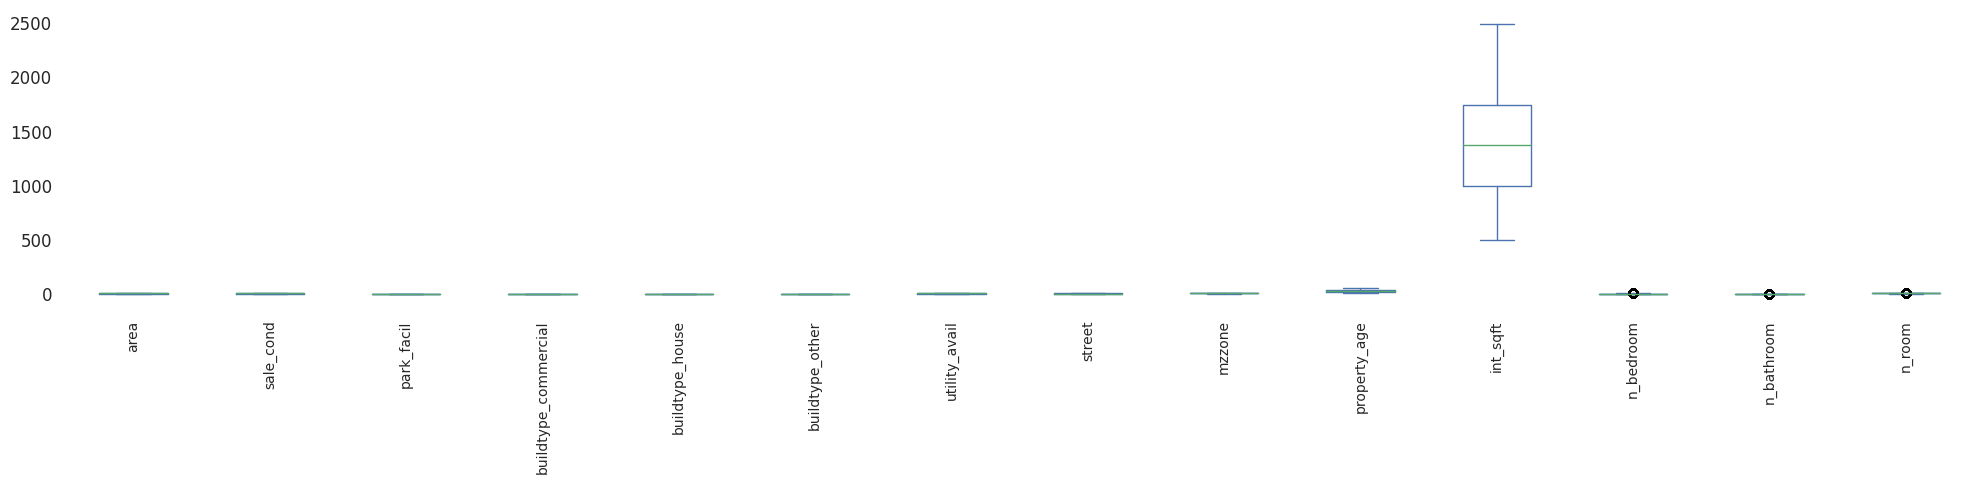

In [ ]:
#Scaling
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

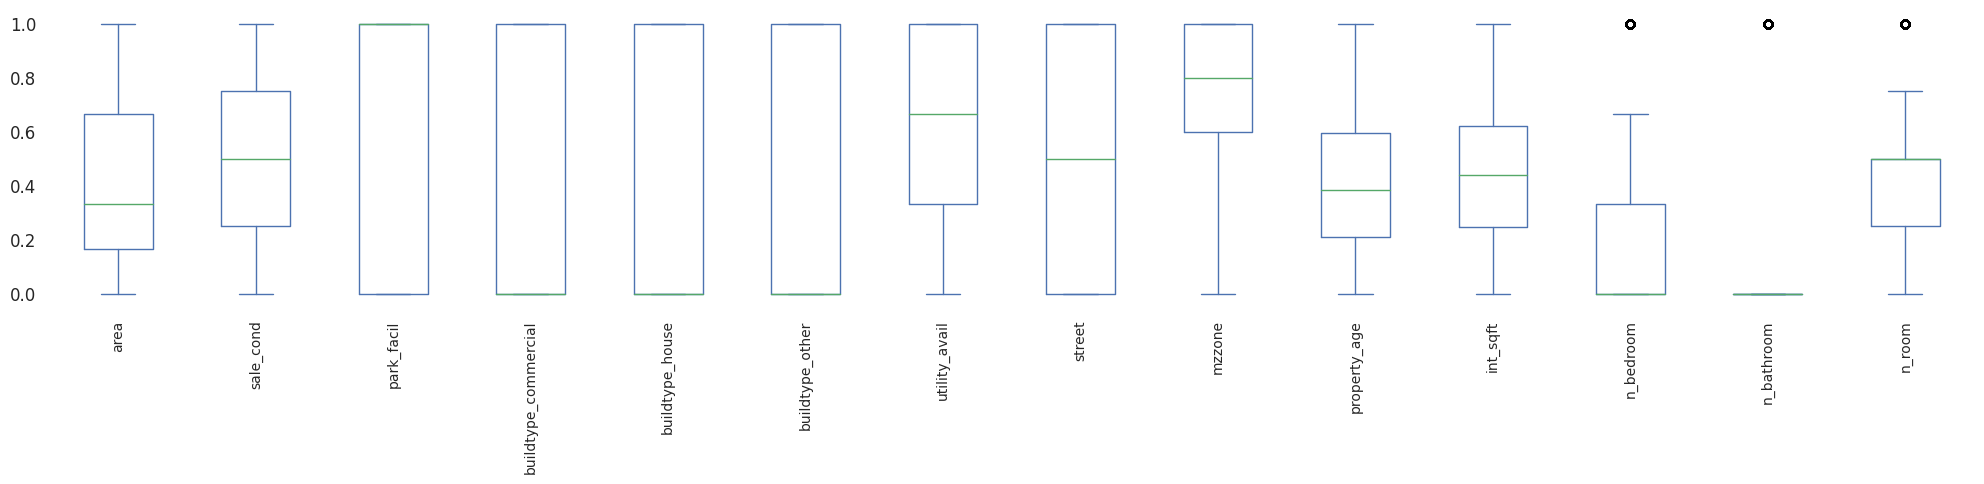

In [ ]:
#MIN - MAX Scaling
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

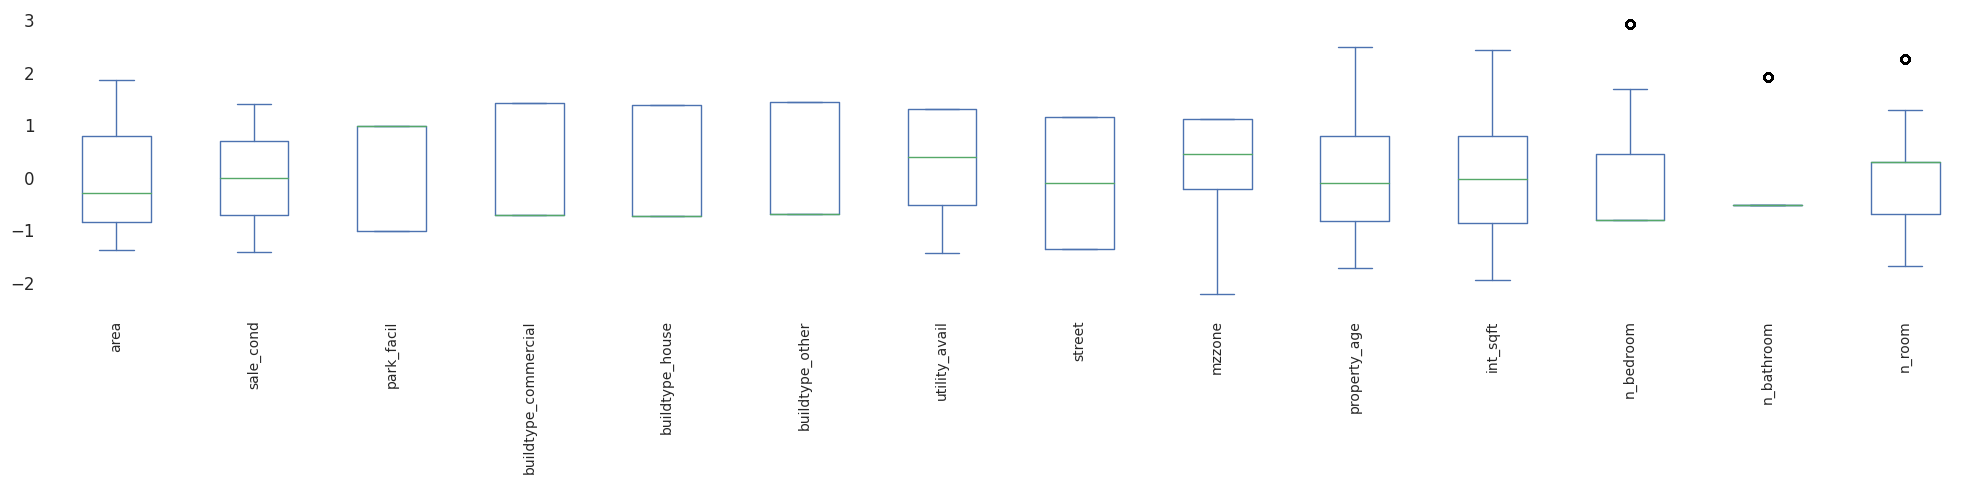

In [ ]:
#Standard Scalar Scaling
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()

In [ ]:
#Model Training
#LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Linear Regression Results:")
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

# lr = LinearRegression()
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

# lr = LinearRegression()
lr.fit(X_train_mm, y_train)
y_predlrmm = lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

print(f"\nb0: {lr.intercept_}, b1: {lr.coef_[0]},b2: {lr.coef_[1]},b3: {lr.coef_[2]},b4: {lr.coef_[3]},b5: {lr.coef_[4]},b6: {lr.coef_[5]},b7: {lr.coef_[6]},b8: {lr.coef_[7]},b9: {lr.coef_[8]},b10: {lr.coef_[9]},b11: {lr.coef_[10]},b12: {lr.coef_[11]},b13: {lr.coef_[12]},b14: {lr.coef_[13]}")


Linear Regression Results:
R2- SCORE: 0.923424259980204
R2- SCORE(Standardscaler): 0.9235709092298616
R2- SCORE(Minmaxscaled): 0.9234341021512532

b0: -2.2680638759993397e+19, b1: 3398319.8453738485,b2: 628055.5066952799,b3: 1021861.7144198336,b4: 2.2680638759999504e+19,b5: 2.268063875999485e+19,b6: 2.2680638759995503e+19,b7: 155554.01581486367,b8: 999073.8953903806,b9: 2901648.096120326,b10: -935040.0477696318,b11: 2839363.650650799,b12: -4738589.370777733,b13: 260350.80238717084,b14: 7022606.006141235


In [ ]:
out=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_pred})
result=df.merge(out,left_index=True,right_index=True)
result[['area','Sale_Price_actual','Sale_Price_pred']].sample(25)

area  Sale_Price_actual  Sale_Price_pred
686      1            6602375     6.802186e+06
6348     7           22726060     1.942327e+07
5003     5           17492740     1.727957e+07
4070     2           14203140     1.272643e+07
888      3           12508650     1.375010e+07
415      5           13586120     1.462856e+07
2869     7           12290970     1.341166e+07
2610     3           14030400     1.430271e+07
4595     4            7852070     8.335597e+06
399      6           13620040     1.321667e+07
6053     1            5255750     5.690598e+06
6695     1            9306125     9.605280e+06
2058     3           12863400     1.381590e+07
5014     1           10868500     1.205598e+07
6478     6           12109340     1.283764e+07
2876     1           10630250     1.187623e+07
1579     4           11360310     1.107672e+07
602      3            9718570     8.973596e+06
5242     2           10436115     1.101304e+07
2126     3           11515200     1.247029e+07
5792     4            9235150     9.679627e+06
3797     7           13990830     1.451612e+07
137      5           11412700     1.245900e+07
374      1            8215250     8.464366e+06
5828     5           11494940     1.205539e+07

In [ ]:
#KNN 
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print("KNearestNeighbors Results:")
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_mm, y_train)
y_predknn_mm = knn.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_mm))

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_ss, y_train)
y_predknn_ss = knn.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_ss))
out2=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_predknn})
result=df.merge(out2,left_index=True,right_index=True)
print("\n")
result[['area','Sale_Price_actual','Sale_Price_pred']].sample(25)

KNearestNeighbors Results:
R2- SCORE: 0.43309895459186276
R2- SCORE(Minmaxscaled): 0.9328390801356576
R2- SCORE(Standardscaler): 0.952640497194667




area  Sale_Price_actual  Sale_Price_pred
4267     3            7883050       7798205.95
1386     4           13460460      11211839.55
4016     5            9630040       9496889.90
3259     2            7895235       8925288.00
4957     6           15324610      13589803.20
530      6           12624040      14646949.00
5718     2           14038465       9792148.00
6888     5           12415480      10266483.00
1372     3            8367250       9892043.10
4283     1           10106750       9054517.70
5664     5           15598600      13119744.50
122      3            9253200       9744113.30
4715     6           16859010      14995733.70
4010     6           13186470      12417217.55
5468     1            7756750       9675971.30
2932     7           12043670      12420058.55
2245     4           10737430      14949927.90
4251     3           12335200       8275787.50
4669     4           11531350      11756040.95
1381     1            6936250       6906283.50
4803     4           15163850      12605454.20
527      2           10252895       9412144.50
1668     5           14400140      13579642.90
3686     6           12812990      11680042.55
4807     7           11350430      13497528.10

In [ ]:
#DecisionTree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Results:")
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))
out3=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_pred_dt})
result=df.merge(out3,left_index=True,right_index=True)
print("\n")
result[['area','Sale_Price_actual','Sale_Price_pred']].sample(25)


Decision Tree Results:
R2- SCORE: 0.9748221657974778
R2- SCORE(Minmaxscaled): 0.9744049936920205
R2- SCORE(Standardscaler): 0.974895465932899




area  Sale_Price_actual  Sale_Price_pred
5753     3           13063900       13383350.0
530      6           12624040       13575290.0
3129     1            4555875        5254250.0
2388     3           13090350       12072650.0
6732     2           15242220       14246650.0
2868     3           12524250       12907200.0
6636     4           16222200       15421030.0
680      2            8173180        8191450.0
6117     4            9975260        9570490.0
5001     6           12490460       12654180.0
7051     6           13049030       14280890.0
1940     3            9095330        9283260.0
1187     4           11653680       12225650.0
3331     6           13714220       13293200.0
3259     2            7895235        8017350.0
718      4           11671340       10728940.0
3435     6           19730040       18976810.0
1148     5           11447860       12043540.0
257      4           10530200       10581870.0
3776     1            7514750        7443250.0
427      4           11959100       12146620.0
1176     2           10474605       10428940.0
4147     2           11046310       10431150.0
76       1            9917500        8629750.0
2622     1            6824750        5976000.0

In [ ]:
#Random Forest
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_mm, y_train);
y_pred_rfmm = rf.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_ss, y_train);
y_pred_rfss = rf.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))
out4=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_pred_rf})
result=df.merge(out4,left_index=True,right_index=True)
print("\n")
result[['area','Sale_Price_actual','Sale_Price_pred']].sample(25)

Random Forest Results:
R2- SCORE: 0.9875242038285857
R2- SCORE(minmaxscaled): 0.9870715311292885
R2- SCORE(Standardscaler): 0.987176079120746




area  Sale_Price_actual  Sale_Price_pred
5604     3           11046700     1.118357e+07
4467     5           12427940     1.227834e+07
2613     3            8857150     8.949123e+06
5224     1            6614000     7.142058e+06
5350     3            7387600     7.503140e+06
424      1            7880000     7.485966e+06
763      3           12893050     1.262792e+07
1244     7           11440690     1.164206e+07
4900     6           12575330     1.282290e+07
1314     5           12871060     1.289574e+07
2327     3           11534600     1.150965e+07
637      2            8984810     9.932378e+06
4454     1           10178500     1.018105e+07
4402     5           11177540     1.108708e+07
1717     6           10841760     1.097650e+07
2388     3           13090350     1.279239e+07
166      4           16617860     1.609315e+07
856      6           11574780     1.214867e+07
5333     3            7036410     7.097613e+06
5514     2           10820520     9.885619e+06
429      5            9338880     9.967513e+06
3780     5           11375820     1.155996e+07
4906     5           17253540     1.687955e+07
6399     5            9774800     9.973236e+06
231      6           12477040     1.260798e+07

In [ ]:
#Extra Tree Regressor
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
print("Extra Tree Regressor Results:")
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_etr))

y_pred_etrmm = etr.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_etrmm))

y_pred_etrss = etr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_etrss))
out5=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_pred_etr})
result5=df.merge(out5,left_index=True,right_index=True)
print("\n")
result5[['area','Sale_Price_actual','Sale_Price_pred']].sample(25)

Extra Tree Regressor Results:
R2- SCORE: 0.990943175687814
R2- SCORE(minmaxscaled): -3.4543088231107575
R2- SCORE(Standardscaler): -2.9228905733870048




area  Sale_Price_actual  Sale_Price_pred
1385     2            7881135       8443456.40
1273     6           11618510      11965521.80
4987     1            7575000       7203957.50
3974     6           12359320      12483262.10
6278     1            5488250       6225387.50
6695     1            9306125       9312042.50
2785     1            7245250       7232503.75
4283     1           10106750      11107062.50
3701     1           12268750      12145377.50
533      4           10274050       9916403.00
2740     5           13014440      12876873.70
4929     1            3029750       3156681.25
1753     7           20034510      20135001.00
3752     2           13089560      13574316.05
1699     4            6766430       6798441.65
4547     6           21330680      21071599.00
2055     2           11157225      11256539.25
5556     1            8994500       8909810.00
4253     4           14214940      14911062.00
5069     3           10151900      10081265.50
3349     6           21544930      21186246.90
7011     6           10353250      10972185.80
6123     5           12728180      12739113.20
2869     7           12290970      12383732.60
3422     1            9563000       9575057.50

In [ ]:
#GradientBoostingRegressor
for lr in [0.5]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.5  Train score :  0.9977218437506626  Test score :  0.996924480321312


In [ ]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("Gradient Boosting Regressor Results:")
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

gbr.fit(X_train_mm, y_train)
y_pred_gbrmm = gbr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

gbr.fit(X_train_ss, y_train)
y_pred_gbrss = gbr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))
out6=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_pred_gbr})
result6=df.merge(out6,left_index=True,right_index=True)
print("\n")
result6[['area','Sale_Price_actual','Sale_Price_pred']].sample(25)

Gradient Boosting Regressor Results:
R2- SCORE: 0.996932216822728
R2- SCORE(MinMaxScaler): 0.9969315921858486
R2- SCORE(Standardscaler): 0.9969225695731113




area  Sale_Price_actual  Sale_Price_pred
3704     1            8974750     8.822811e+06
7057     5           11273740     1.133766e+07
1625     5           13940580     1.433287e+07
4733     4            7824540     8.198006e+06
444      5           10652120     1.035061e+07
2638     3           11113950     1.113406e+07
6188     5           11472860     1.158028e+07
54       2            5570050     5.705348e+06
1486     3           12798800     1.256773e+07
6011     1            6787250     6.757786e+06
1579     4           11360310     1.139077e+07
1803     4            9640180     9.946786e+06
6597     4            9341570     9.687937e+06
5890     6           18127850     1.778048e+07
1375     1           10651250     1.034969e+07
6432     2            9079875     9.132455e+06
4995     5           13867560     1.361612e+07
5567     1            8474250     8.740894e+06
1381     1            6936250     6.581187e+06
436      1            5668875     5.971260e+06
976      1           10032375     9.828701e+06
6996     5            9261000     9.202449e+06
5921     6           13177330     1.286915e+07
1337     1            5679000     5.583374e+06
4368     1            8255500     8.636581e+06

In [ ]:
#XGBoost
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.2  Train score :  0.9992660104447402  Test score :  0.9973395154694097
Learning rate :  0.5  Train score :  0.9993955180513335  Test score :  0.9945515971835168
Learning rate :  0.7  Train score :  0.9994957696918326  Test score :  0.9923636387616817
Learning rate :  0.8  Train score :  0.9995920937678331  Test score :  0.991359456393351
Learning rate :  1  Train score :  0.9995570716304891  Test score :  0.9858694839363642


In [ ]:
xg = xgb.XGBRegressor(learning_rate = .5, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_xg = xg.predict(X_test)
print("XGBoost Results:")
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_xg))

xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))
out7=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_pred_xg})
result7=df.merge(out7,left_index=True,right_index=True)
print("\n")
result7[['area','Sale_Price_actual','Sale_Price_pred']].sample(25)

XGBoost Results:
R2- SCORE: 0.9945515971835168
R2- SCORE(MinMaxScaler): 0.9945590736486
R2- SCORE(Standardscaler): 0.9945382747445967




area  Sale_Price_actual  Sale_Price_pred
2390     5           15443180      15438399.00
137      5           11412700      11490696.00
4396     3            7954770       8258072.00
3358     7           19286610      19603332.00
1299     1            9407500       9136163.00
4502     3            9750500       9359218.00
2412     6           14239590      13967907.00
5770     1            7825250       7727541.00
48       1            8379000       8397248.00
6740     6           13263370      13233649.00
1228     6           20525170      20697996.00
6752     3           11321050      11082630.00
5547     1            8904750       9071427.00
3076     1            3250250       3040118.25
616      5           14192960      14381444.00
6908     3            9868600       9994349.00
1019     5           11291220      11296019.00
3661     1           11019000      11210395.00
1135     2            9640575       9810374.00
1136     3           11239600      11296174.00
1757     2           10843610      10580038.00
2504     1            7637750       6946088.00
1273     6           11618510      11807748.00
1253     6           20519100      20268536.00
3604     3            8410150       8451131.00

In [ ]:
#Ensemble Learning
#Voting Regressor
dt = DecisionTreeRegressor()
# knn = KNeighborsRegressor(n_neighbors=100)
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100)
gbr = GradientBoostingRegressor(learning_rate=.5)
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

vr = VotingRegressor([('dt', dt), ('lr', lr), ('rf', rf), ('xg', xg), ('gbr', gbr), ('etr', etr)])

vr.fit(X_train, y_train);
y_pred_vr = vr.predict(X_test)
print("Voting Regressor Results:")
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_vr))

vr.fit(X_train_ss, y_train);
y_pred_vrss = vr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_vrss))

vr.fit(X_train_mm, y_train);
y_pred_vrmm = vr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_vr))
out8=pd.DataFrame({'Sale_Price_actual':y_test,'Sale_Price_pred':y_pred_vr})
result8=df.merge(out8,left_index=True,right_index=True)
print("\n")
result8[['area','Sale_Price_actual','Sale_Price_pred']].sample(25)

Voting Regressor Results:
R2- SCORE: 0.9935555639419458
R2- SCORE(Standardscaler): 0.9935590391141527
R2- SCORE(MinMaxScaler): 0.9935555639419458




area  Sale_Price_actual  Sale_Price_pred
6847     4           10506870     1.027961e+07
6058     4            7866010     7.818621e+06
2803     6           19576490     1.928755e+07
5419     3           10636110     1.044430e+07
5570     1            4256250     4.336354e+06
76       1            9917500     9.656791e+06
5562     2            6515045     6.569940e+06
2195     3            9002750     8.951279e+06
2735     3           10884400     1.050930e+07
4988     4            7182160     7.638133e+06
3215     3            8007290     7.850404e+06
4560     4            7167380     7.358015e+06
947      4            9865200     9.706363e+06
3361     3            8111250     8.211848e+06
980      5           17651360     1.748677e+07
4537     4           15344360     1.549572e+07
5291     2            8380775     8.164721e+06
6891     3           10308550     1.008614e+07
3338     3            6207400     6.612715e+06
436      1            5668875     5.613088e+06
7102     1            5643500     5.588289e+06
5074     6           19897420     1.958509e+07
6073     3            8169350     8.482817e+06
1987     6           11779810     1.194496e+07
3542     2            6618400     6.385635e+06